# Попередня перевірка імпорту

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn")

df = pd.DataFrame()

files = [
    'rollingsales_bronx.xlsx',
    'rollingsales_brooklyn.xlsx',
    'rollingsales_manhattan.xlsx',
    'rollingsales_queens.xlsx',
    'rollingsales_statenisland.xlsx'
]

for file in files:
    district = file.split('_')[1].split('.')[0].capitalize()  
    data = pd.read_excel(file)
    data['DISTRICT'] = district  
    df = pd.concat([df, data], ignore_index=True)

df

BOROUGH NEIGHBORHOOD     BUILDING CLASS CATEGORY TAX CLASS AT PRESENT  \
0            2     BATHGATE     01 ONE FAMILY DWELLINGS                    1   
1            2     BATHGATE     01 ONE FAMILY DWELLINGS                    1   
2            2     BATHGATE     01 ONE FAMILY DWELLINGS                    1   
3            2     BATHGATE     01 ONE FAMILY DWELLINGS                    1   
4            2     BATHGATE     02 TWO FAMILY DWELLINGS                    1   
...        ...          ...                         ...                  ...   
73300        5      WOODROW  05 TAX CLASS 1 VACANT LAND                    1   
73301        5      WOODROW  05 TAX CLASS 1 VACANT LAND                    1   
73302        5      WOODROW  05 TAX CLASS 1 VACANT LAND                   1B   
73303        5      WOODROW  05 TAX CLASS 1 VACANT LAND                   1B   
73304        5      WOODROW          22 STORE BUILDINGS                    4   

       BLOCK  LOT  EASEMENT BUILDING CLASS AT PRESENT                ADDRESS  \
0       3028   24       NaN                        A1  410 EAST 179TH STREET   
1       3030   66       NaN                        A1       4453 PARK AVENUE   
2       3030   66       NaN                        A1       4453 PARK AVENUE   
3       3035   52       NaN                        A1    461 EAST 178 STREET   
4       2904   22       NaN                        B9    454 EAST 172 STREET   
...      ...  ...       ...                       ...                    ...   
73300   6970   84       NaN                        A1     N/A LENEVAR AVENUE   
73301   6970   85       NaN                        A1     N/A LENEVAR AVENUE   
73302   6970   86       NaN                        V0     N/A LENEVAR AVENUE   
73303   6970   87       NaN                        V0      96 LENEVAR AVENUE   
73304   7144  510       NaN                        K2  3120 ARTHUR KILL ROAD   

      APARTMENT NUMBER  ...  COMMERCIAL UNITS  TOTAL UNITS  LAND SQUARE FEET  \
0                  NaN  ...               0.0          1.0            1842.0   
1                  NaN  ...               0.0          1.0            1646.0   
2                  NaN  ...               0.0          1.0            1646.0   
3                  NaN  ...               0.0          1.0            1782.0   
4                  NaN  ...               0.0          2.0            1658.0   
...                ...  ...               ...          ...               ...   
73300              NaN  ...               0.0          1.0            2603.0   
73301              NaN  ...               0.0          1.0            2551.0   
73302              NaN  ...               0.0          0.0            2597.0   
73303              NaN  ...               0.0          0.0            2644.0   
73304              NaN  ...               1.0          1.0           98116.0   

       GROSS SQUARE FEET  YEAR BUILT  TAX CLASS AT TIME OF SALE  \
0                 2048.0      1901.0                          1   
1                 1497.0      1899.0                          1   
2                 1497.0      1899.0                          1   
3                 1548.0      1899.0                          1   
4                 1428.0      1901.0                          1   
...                  ...         ...                        ...   
73300                0.0      2022.0                          1   
73301                0.0         NaN                          1   
73302                0.0      2023.0                          1   
73303                0.0      2023.0                          1   
73304             7795.0      1977.0                          4   

       BUILDING CLASS AT TIME OF SALE  SALE PRICE  SALE DATE      DISTRICT  
0                                  A1      655000 2022-11-01         Bronx  
1                                  A1      215000 2023-04-18         Bronx  
2                                  A1      570000 2023-08-23         Bronx  
3          

## Отримання базової інформації по датафрейму

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73305 entries, 0 to 73304
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   BOROUGH                         73305 non-null  int64         
 1   NEIGHBORHOOD                    73305 non-null  object        
 2   BUILDING CLASS CATEGORY         73305 non-null  object        
 3   TAX CLASS AT PRESENT            73240 non-null  object        
 4   BLOCK                           73305 non-null  int64         
 5   LOT                             73305 non-null  int64         
 6   EASEMENT                        0 non-null      float64       
 7   BUILDING CLASS AT PRESENT       73240 non-null  object        
 8   ADDRESS                         73305 non-null  object        
 9   APARTMENT NUMBER                17697 non-null  object        
 10  ZIP CODE                        73300 non-null  float64       
 11  RE

## Видалення поржньої колонки

In [3]:
df = df.drop('EASEMENT', axis = 1)
df.head(5)

BOROUGH NEIGHBORHOOD  BUILDING CLASS CATEGORY TAX CLASS AT PRESENT  BLOCK  \
0        2     BATHGATE  01 ONE FAMILY DWELLINGS                    1   3028   
1        2     BATHGATE  01 ONE FAMILY DWELLINGS                    1   3030   
2        2     BATHGATE  01 ONE FAMILY DWELLINGS                    1   3030   
3        2     BATHGATE  01 ONE FAMILY DWELLINGS                    1   3035   
4        2     BATHGATE  02 TWO FAMILY DWELLINGS                    1   2904   

   LOT BUILDING CLASS AT PRESENT                ADDRESS APARTMENT NUMBER  \
0   24                        A1  410 EAST 179TH STREET              NaN   
1   66                        A1       4453 PARK AVENUE              NaN   
2   66                        A1       4453 PARK AVENUE              NaN   
3   52                        A1    461 EAST 178 STREET              NaN   
4   22                        B9    454 EAST 172 STREET              NaN   

   ZIP CODE  ...  COMMERCIAL UNITS  TOTAL UNITS  LAND SQUARE FEET  \
0   10457.0  ...               0.0          1.0            1842.0   
1   10457.0  ...               0.0          1.0            1646.0   
2   10457.0  ...               0.0          1.0            1646.0   
3   10457.0  ...               0.0          1.0            1782.0   
4   10457.0  ...               0.0          2.0            1658.0   

   GROSS SQUARE FEET  YEAR BUILT  TAX CLASS AT TIME OF SALE  \
0             2048.0      1901.0                          1   
1             1497.0      1899.0                          1   
2             1497.0      1899.0                          1   
3             1548.0      1899.0                          1   
4             1428.0      1901.0                          1   

   BUILDING CLASS AT TIME OF SALE SALE PRICE  SALE DATE DISTRICT  
0                              A1     655000 2022-11-01    Bronx  
1                              A1     215000 2023-04-18    Bronx  
2                              A1     570000 2023-08-23    Bronx  
3                              A1          0 2023-04-14    Bronx  
4                              B9     350000 2023-06-26    Bronx  

[5 rows x 21 columns]

## Перевірка точної кількості порожніх клітинок в колонках

In [4]:
df.isna().sum()

BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                 65
BLOCK                                 0
LOT                                   0
BUILDING CLASS AT PRESENT            65
ADDRESS                               0
APARTMENT NUMBER                  55608
ZIP CODE                              5
RESIDENTIAL UNITS                 17833
COMMERCIAL UNITS                  31037
TOTAL UNITS                       15504
LAND SQUARE FEET                  33366
GROSS SQUARE FEET                 33366
YEAR BUILT                         4875
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                            0
SALE DATE                             0
DISTRICT                              0
dtype: int64

## Перевірка на наявність дублікатів

In [5]:
df.loc[df.duplicated(), :]

Empty DataFrame
Columns: [BOROUGH, NEIGHBORHOOD, BUILDING CLASS CATEGORY, TAX CLASS AT PRESENT, BLOCK, LOT, BUILDING CLASS AT PRESENT, ADDRESS, APARTMENT NUMBER, ZIP CODE, RESIDENTIAL UNITS, COMMERCIAL UNITS, TOTAL UNITS, LAND SQUARE FEET, GROSS SQUARE FEET, YEAR BUILT, TAX CLASS AT TIME OF SALE, BUILDING CLASS AT TIME OF SALE, SALE PRICE, SALE DATE, DISTRICT]
Index: []

[0 rows x 21 columns]

<Axes: >

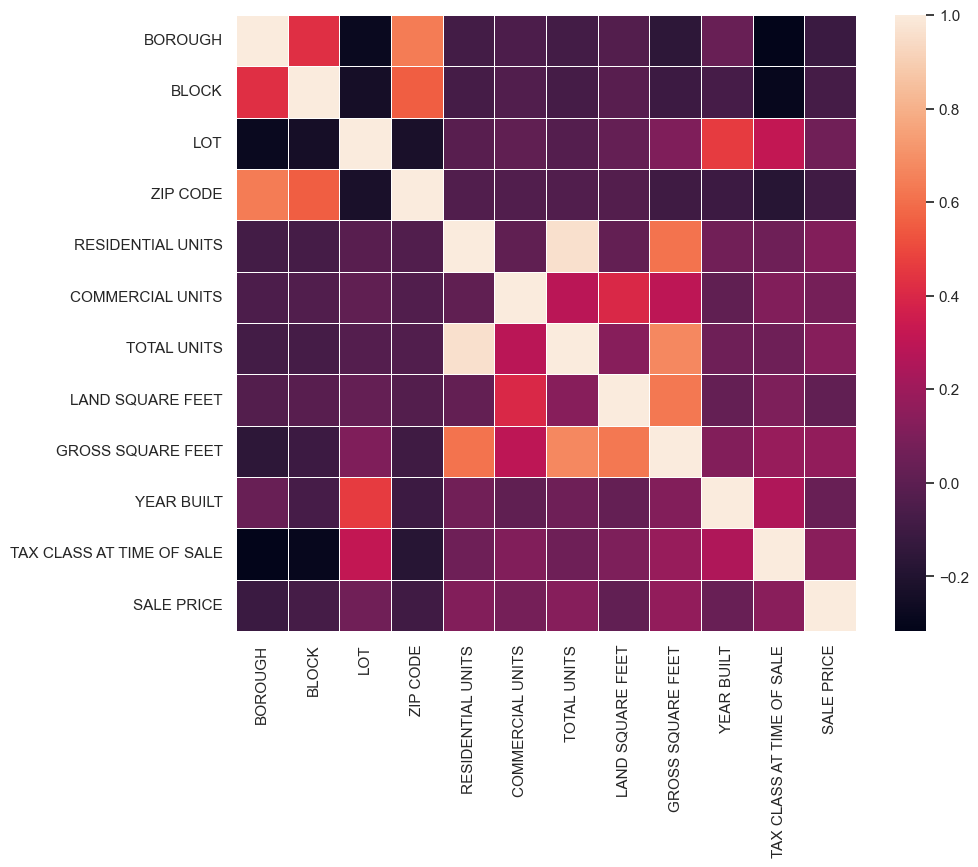

In [6]:
sns.set(style="whitegrid")

sns.set(rc={'figure.figsize':(10, 8)})
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=False, fmt=".1f", linewidth=.5)

# Район Bronx

In [7]:
df_bronx = df[df['DISTRICT'] == 'Bronx']
df_bronx

BOROUGH NEIGHBORHOOD                   BUILDING CLASS CATEGORY  \
0           2     BATHGATE                   01 ONE FAMILY DWELLINGS   
1           2     BATHGATE                   01 ONE FAMILY DWELLINGS   
2           2     BATHGATE                   01 ONE FAMILY DWELLINGS   
3           2     BATHGATE                   01 ONE FAMILY DWELLINGS   
4           2     BATHGATE                   02 TWO FAMILY DWELLINGS   
...       ...          ...                                       ...   
5635        2     WOODLAWN            10 COOPS - ELEVATOR APARTMENTS   
5636        2     WOODLAWN                        22 STORE BUILDINGS   
5637        2     WOODLAWN                        22 STORE BUILDINGS   
5638        2     WOODLAWN                        22 STORE BUILDINGS   
5639        2     WOODLAWN  35 INDOOR PUBLIC AND CULTURAL FACILITIES   

     TAX CLASS AT PRESENT  BLOCK  LOT BUILDING CLASS AT PRESENT  \
0                       1   3028   24                        A1   
1                       1   3030   66                        A1   
2                       1   3030   66                        A1   
3                       1   3035   52                        A1   
4                       1   2904   22                        B9   
...                   ...    ...  ...                       ...   
5635                    2   3398   97                        D4   
5636                    4   3363   17                        K2   
5637                    4   3380   46                        K1   
5638                    4   3380   46                        K1   
5639                    4   3380   54                        P8   

                      ADDRESS APARTMENT NUMBER  ZIP CODE  ...  \
0       410 EAST 179TH STREET              NaN   10457.0  ...   
1            4453 PARK AVENUE              NaN   10457.0  ...   
2            4453 PARK AVENUE              NaN   10457.0  ...   
3         461 EAST 178 STREET              NaN   10457.0  ...   
4         454 EAST 172 STREET              NaN   10457.0  ...   
...                       ...              ...       ...  ...   
5635  4295 WEBSTER AVENUE, 5F              NaN   10470.0  ...   
5636        23 E 233RD STREET              NaN   10470.0  ...   
5637      4361 KATONAH AVENUE              NaN   10470.0  ...   
5638      4361 KATONAH AVENUE              NaN   10470.0  ...   
5639      4351 KATONAH AVENUE              NaN   10470.0  ...   

      COMMERCIAL UNITS  TOTAL UNITS  LAND SQUARE FEET  GROSS SQUARE FEET  \
0                  0.0          1.0            1842.0             2048.0   
1                  0.0          1.0            1646.0             1497.0   
2                  0.0          1.0            1646.0             1497.0   
3                  0.0          1.0            1782.0             1548.0   
4                  0.0          2.0            1658.0             1428.0   
...                ...          ...               ...                ...   
5635               NaN          NaN               NaN                NaN   
5636               1.0          1.0            2537.0             2635.0   
5637               1.0          1.0            9699.0             3400.0   
5638               1.0          1.0            9699.0             3400.0   
5639               1.0          1.0            3121.0             2520.0   

      YEAR BUILT  TAX CLASS AT TIME OF SALE  BUILDING CLASS AT TIME OF SALE  \
0         1901.0                          1                              A1   
1         1899.0                          1                              A1   
2         1899.0                          1                              A1   
3         1899.0                          1                              A1   
4         1901.0                          1                              B9   
...          ...                        ...                             ...   
5635      1957.0                          2                              D4   
5636      

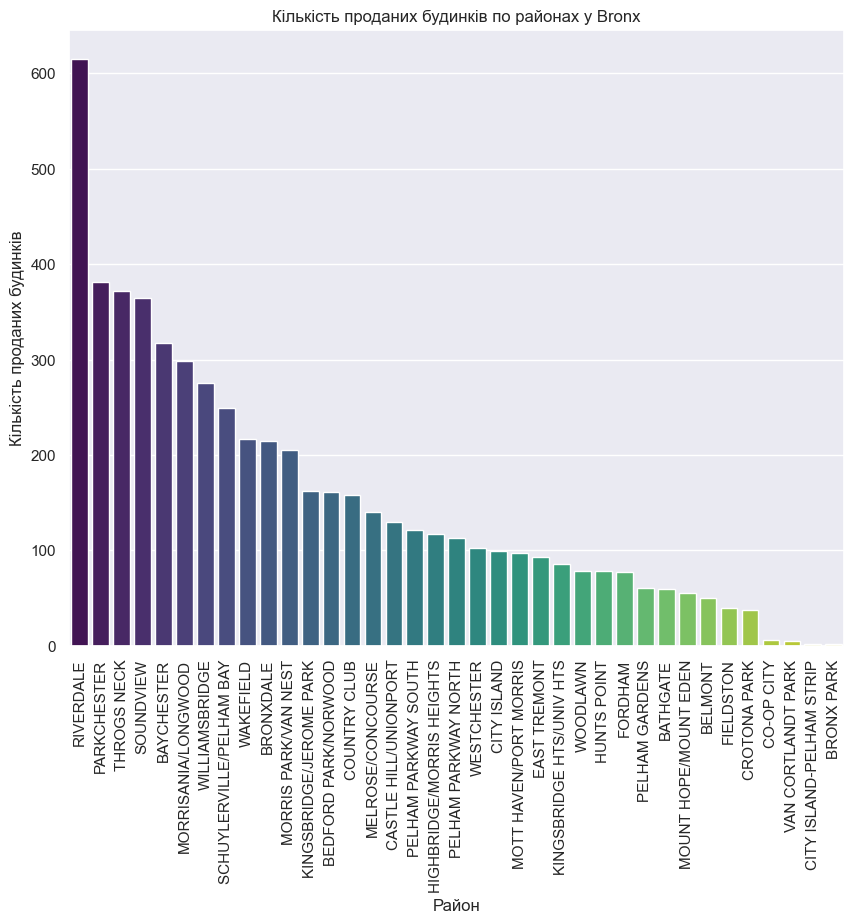

In [8]:
neighborhood_counts = df_bronx['NEIGHBORHOOD'].value_counts()

sns.barplot(x=neighborhood_counts.index, y=neighborhood_counts.values, palette='viridis')
plt.title('Кількість проданих будинків по районах у Bronx')
plt.xlabel('Район')
plt.ylabel('Кількість проданих будинків')
plt.xticks(rotation=90)
plt.show()

C:\Users\andre\AppData\Local\Temp\ipykernel_13772\3386344771.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='NEIGHBORHOOD', y='SALE PRICE', data=df_bronx, ci=None, estimator='mean')


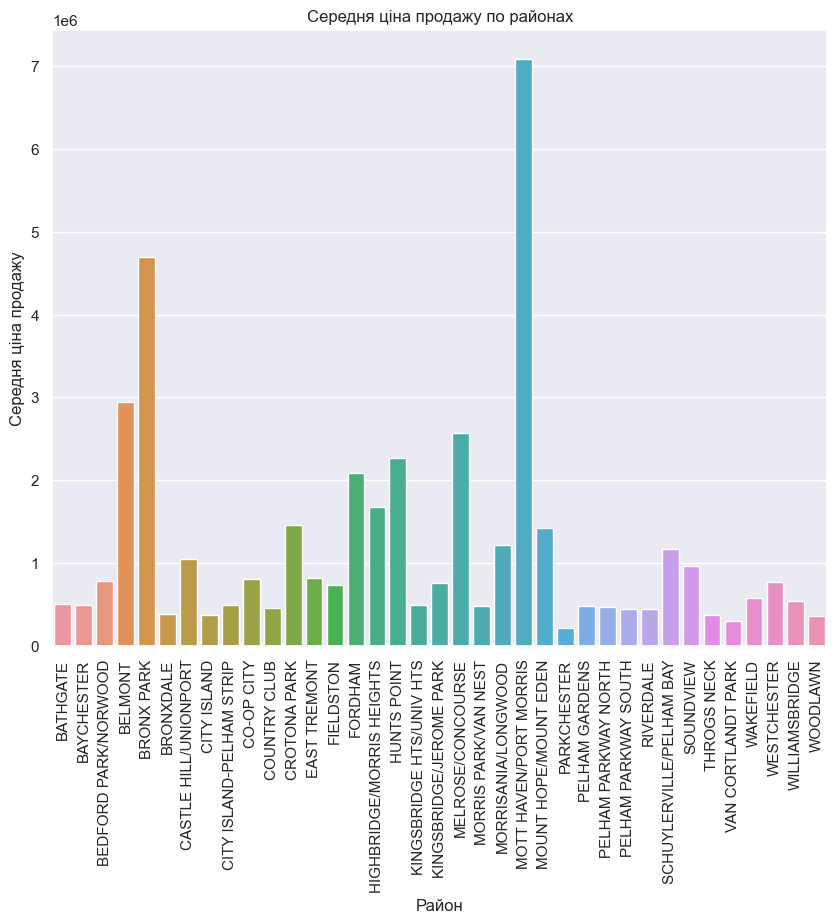

In [9]:
sns.barplot(x='NEIGHBORHOOD', y='SALE PRICE', data=df_bronx, ci=None, estimator='mean')
plt.title('Середня ціна продажу по районах')
plt.xlabel('Район')
plt.ylabel('Середня ціна продажу')
plt.xticks(rotation=90)
plt.show()

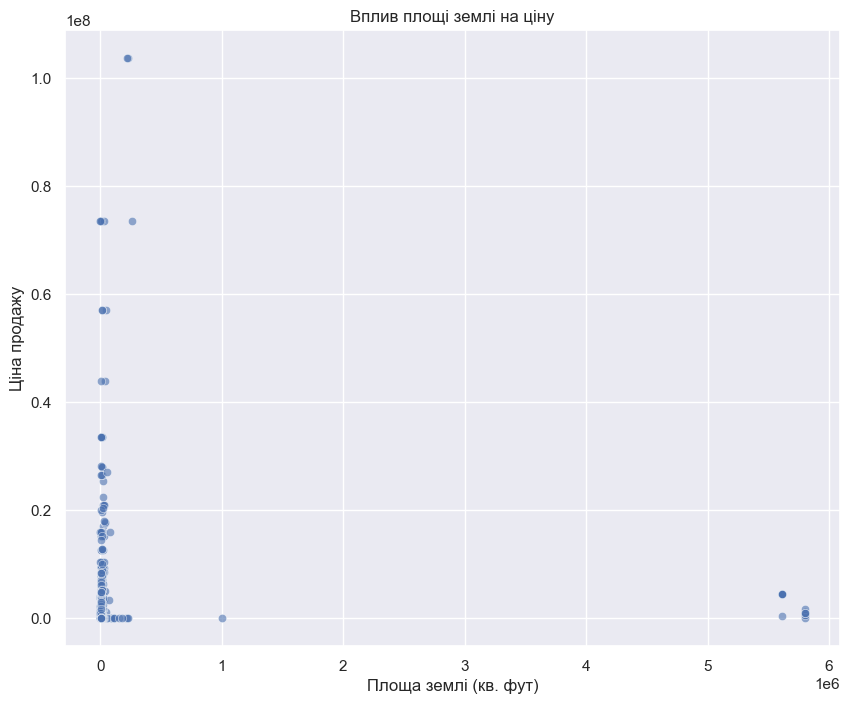

In [10]:
sns.scatterplot(x='LAND SQUARE FEET', y='SALE PRICE', data=df_bronx, alpha=0.6)
plt.title('Вплив площі землі на ціну')
plt.xlabel('Площа землі (кв. фут)')
plt.ylabel('Ціна продажу')
plt.show()

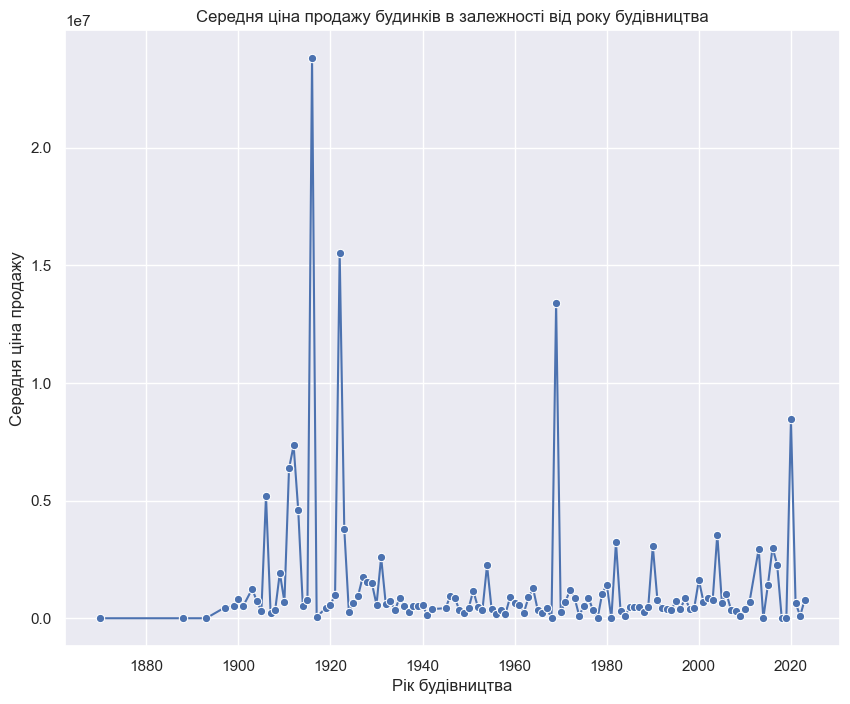

In [11]:
mean_prices = df_bronx.groupby('YEAR BUILT')['SALE PRICE'].mean().reset_index()

sns.lineplot(x='YEAR BUILT', y='SALE PRICE', data=mean_prices, marker='o')
plt.title('Середня ціна продажу будинків в залежності від року будівництва')
plt.xlabel('Рік будівництва')
plt.ylabel('Середня ціна продажу')
plt.show()

C:\Users\andre\AppData\Local\Temp\ipykernel_13772\2298441148.py:1: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x='TAX CLASS AT TIME OF SALE', y='SALE PRICE', data=df_bronx, palette='viridis')


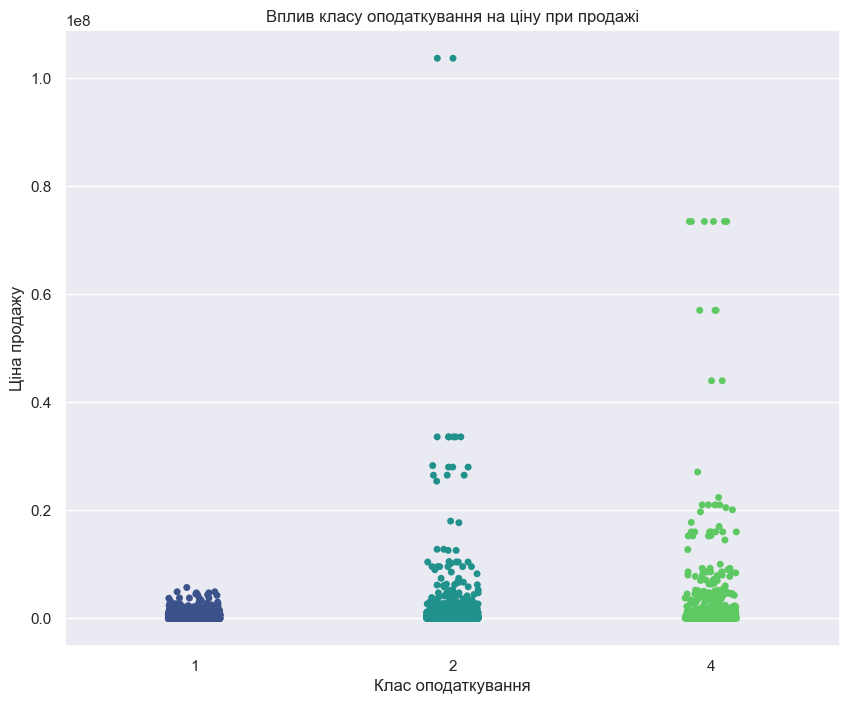

In [12]:
sns.stripplot(x='TAX CLASS AT TIME OF SALE', y='SALE PRICE', data=df_bronx, palette='viridis')
plt.title('Вплив класу оподаткування на ціну при продажі')
plt.xlabel('Клас оподаткування')
plt.ylabel('Ціна продажу')
plt.show()

C:\Users\andre\AppData\Local\Temp\ipykernel_13772\3321117677.py:1: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x='TAX CLASS AT PRESENT', y='SALE PRICE', data=df_bronx, palette='viridis')


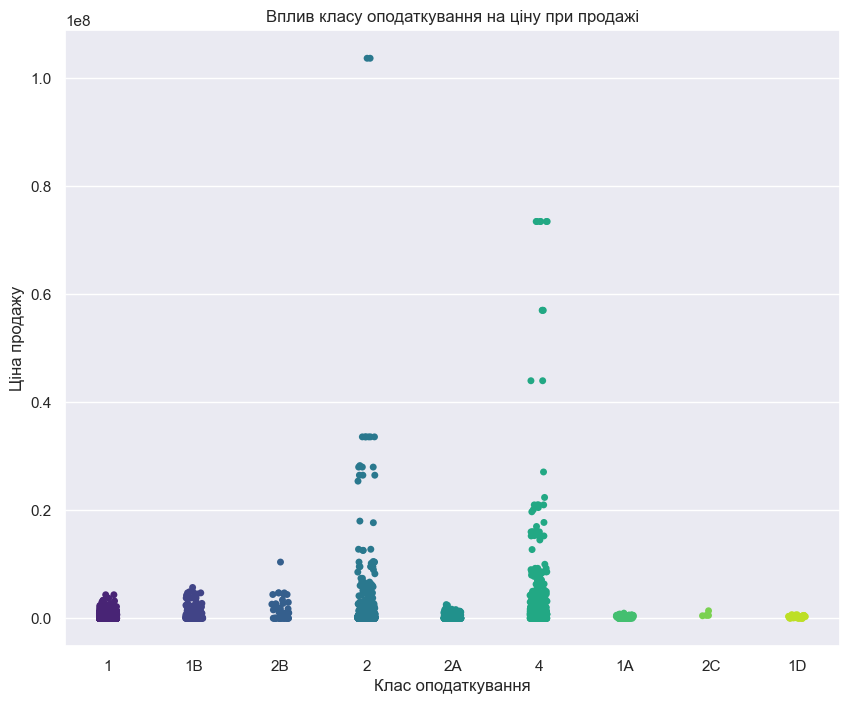

In [13]:
sns.stripplot(x='TAX CLASS AT PRESENT', y='SALE PRICE', data=df_bronx, palette='viridis')
plt.title('Вплив класу оподаткування на ціну при продажі')
plt.xlabel('Клас оподаткування')
plt.ylabel('Ціна продажу')
plt.show()

C:\Users\andre\AppData\Local\Temp\ipykernel_13772\2239910194.py:4: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x='BUILDING CLASS AT TIME OF SALE', y='SALE PRICE', data=df_top_25_classes, palette='viridis', jitter=True)


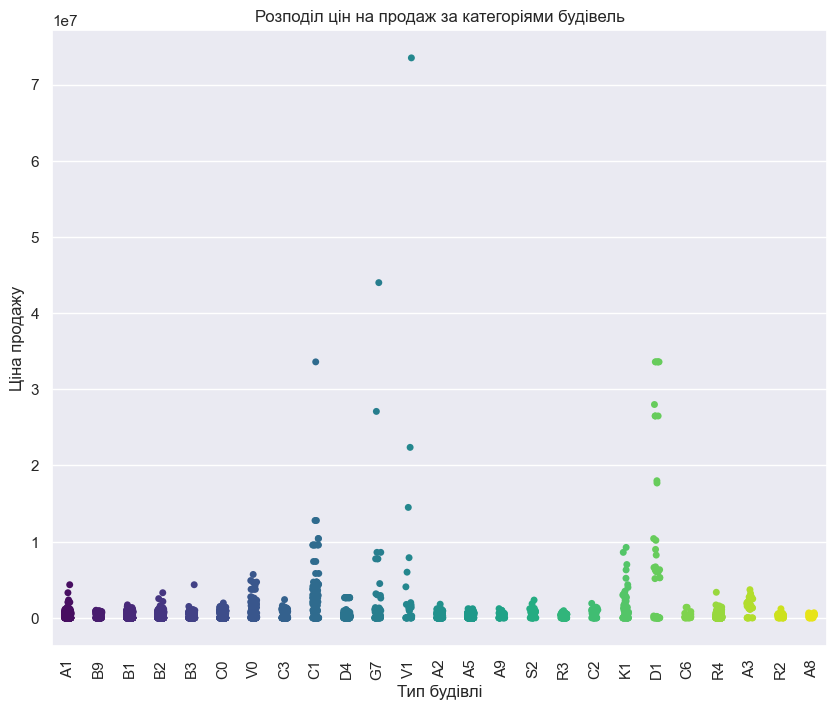

In [14]:
top_25_classes = df_bronx['BUILDING CLASS AT TIME OF SALE'].value_counts().nlargest(25).index
df_top_25_classes = df_bronx[df_bronx['BUILDING CLASS AT TIME OF SALE'].isin(top_25_classes)]

sns.stripplot(x='BUILDING CLASS AT TIME OF SALE', y='SALE PRICE', data=df_top_25_classes, palette='viridis', jitter=True)
plt.title('Розподіл цін на продаж за категоріями будівель')
plt.xlabel('Тип будівлі')
plt.ylabel('Ціна продажу')
plt.xticks(rotation=90)
plt.show()

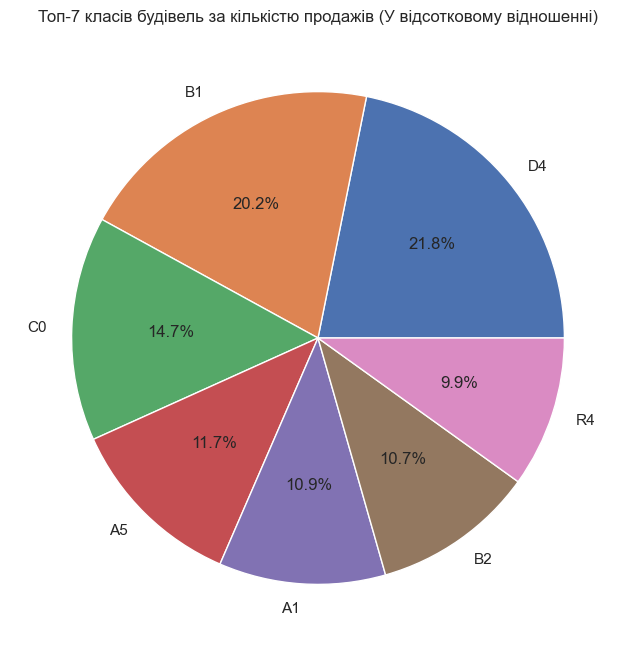

In [15]:
top_7_classes = df_bronx['BUILDING CLASS AT TIME OF SALE'].value_counts().nlargest(7)

plt.pie(top_7_classes, labels=top_7_classes.index, autopct='%1.1f%%')
plt.title('Топ-7 класів будівель за кількістю продажів (У відсотковому відношенні)')
plt.show()

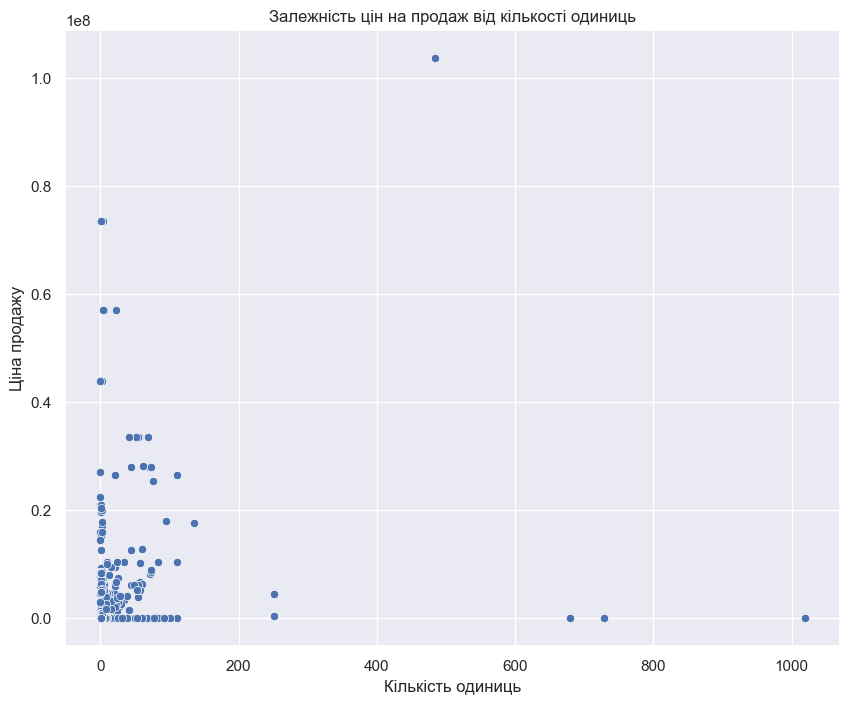

In [16]:
sns.scatterplot(x='TOTAL UNITS', y='SALE PRICE', data=df_bronx)
plt.title('Залежність цін на продаж від кількості одиниць')
plt.xlabel('Кількість одиниць')
plt.ylabel('Ціна продажу')
plt.show()

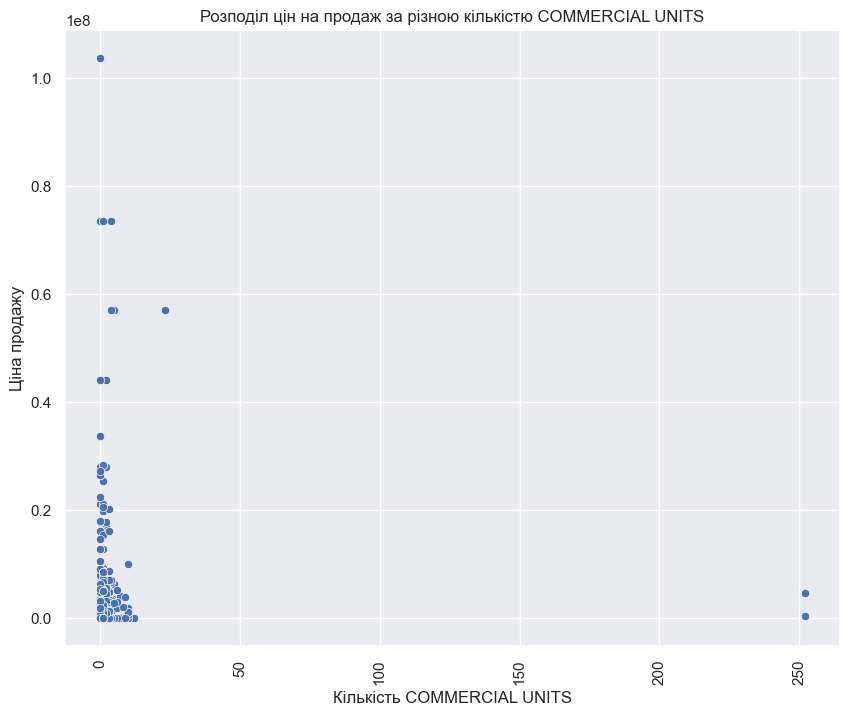

In [17]:
sns.scatterplot(x='COMMERCIAL UNITS', y='SALE PRICE', data=df_bronx)
plt.title('Розподіл цін на продаж за різною кількістю COMMERCIAL UNITS')
plt.xlabel('Кількість COMMERCIAL UNITS')
plt.ylabel('Ціна продажу')
plt.xticks(rotation=90)
plt.show()

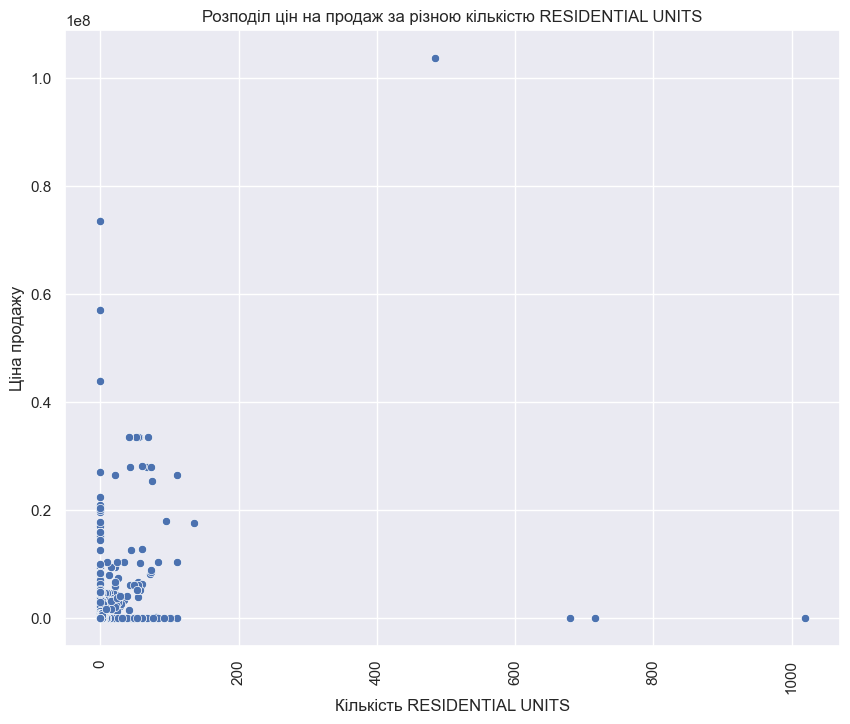

In [18]:
sns.scatterplot(x='RESIDENTIAL UNITS', y='SALE PRICE', data=df_bronx)
plt.title('Розподіл цін на продаж за різною кількістю RESIDENTIAL UNITS')
plt.xlabel('Кількість RESIDENTIAL UNITS')
plt.ylabel('Ціна продажу')
plt.xticks(rotation=90)
plt.show()

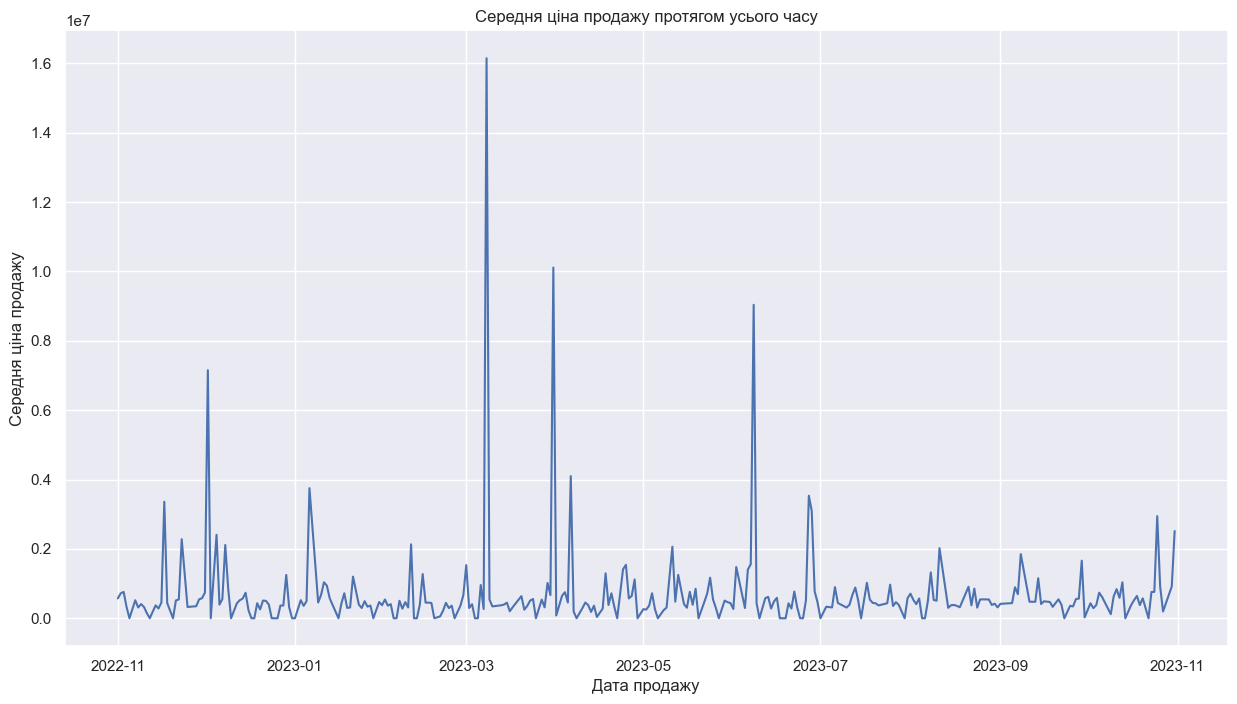

In [19]:
plt.figure(figsize=(15, 8))
sns.lineplot(x='SALE DATE', y='SALE PRICE', data=df_bronx, errorbar=None)
plt.title('Середня ціна продажу протягом усього часу')
plt.xlabel('Дата продажу')
plt.ylabel('Середня ціна продажу')
plt.show()

In [20]:
df['DISTRICT'].unique()

array(['Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Statenisland'],
      dtype=object)

# Brooklyn

In [21]:
df_brooklyn = df[df['DISTRICT'] == 'Brooklyn']
df_brooklyn

BOROUGH     NEIGHBORHOOD    BUILDING CLASS CATEGORY  \
5640         3       BATH BEACH    01 ONE FAMILY DWELLINGS   
5641         3       BATH BEACH    01 ONE FAMILY DWELLINGS   
5642         3       BATH BEACH    01 ONE FAMILY DWELLINGS   
5643         3       BATH BEACH    01 ONE FAMILY DWELLINGS   
5644         3       BATH BEACH    01 ONE FAMILY DWELLINGS   
...        ...              ...                        ...   
26492        3  WYCKOFF HEIGHTS      29 COMMERCIAL GARAGES   
26493        3  WYCKOFF HEIGHTS              30 WAREHOUSES   
26494        3  WYCKOFF HEIGHTS  31 COMMERCIAL VACANT LAND   
26495        3  WYCKOFF HEIGHTS           44 CONDO PARKING   
26496        3  WYCKOFF HEIGHTS           44 CONDO PARKING   

      TAX CLASS AT PRESENT  BLOCK   LOT BUILDING CLASS AT PRESENT  \
5640                     1   6360    56                        A5   
5641                     1   6360    68                        A5   
5642                     1   6362    23                        A9   
5643                     1   6367    42                        S1   
5644                     1   6367    43                        S1   
...                    ...    ...   ...                       ...   
26492                    4   3310    44                        G1   
26493                    4   3168    14                        E1   
26494                    4   3188    52                        V1   
26495                    4   3290  1417                        RP   
26496                    4   3328  1091                        RP   

                       ADDRESS APARTMENT NUMBER  ZIP CODE  ...  \
5640        30 BAY 10TH STREET              NaN   11228.0  ...   
5641        58 BAY 10TH STREET              NaN   11228.0  ...   
5642        43 BAY 11TH STREET              NaN   11228.0  ...   
5643          1730 86TH STREET              NaN   11214.0  ...   
5644          1732 86TH STREET              NaN   11214.0  ...   
...                        ...              ...       ...  ...   
26492       341 MENAHAN STREET              NaN   11237.0  ...   
26493  1250-66 FLUSHING AVENUE              NaN   11237.0  ...   
26494         227 STARR STREET              NaN   11237.0  ...   
26495   364 HARMAN STREET, PS1              PS1   11237.0  ...   
26496    358 GROVE STREET, P30              P30   11237.0  ...   

       COMMERCIAL UNITS  TOTAL UNITS  LAND SQUARE FEET  GROSS SQUARE FEET  \
5640                0.0          1.0            1547.0             1428.0   
5641                0.0          1.0            1547.0             1428.0   
5642                0.0          1.0            2280.0             1052.0   
5643                1.0          2.0            1342.0             1920.0   
5644                1.0          2.0            1342.0             1920.0   
...                 ...          ...               ...                ...   
26492               1.0          1.0            2000.0             2000.0   
26493               3.0          3.0           18727.0            18727.0   
26494               0.0          0.0            2500.0                0.0   
26495               1.0          1.0               NaN                NaN   
26496               1.0          1.0               NaN                NaN   

       YEAR BUILT  TAX CLASS AT TIME OF SALE  BUILDING CLASS AT TIME OF SALE  \
5640       1930.0                          1                              A5   
5641       1930.0                          1                              A5   
5642       1901.0                          1                              A9   
5643       1926.0                          1                              S1   
5644       1926.0                          1                              S1   
...           ...                        ...                             ...   
26492      1931.0                          4                              G1   
26493      1979.0                          4                              E

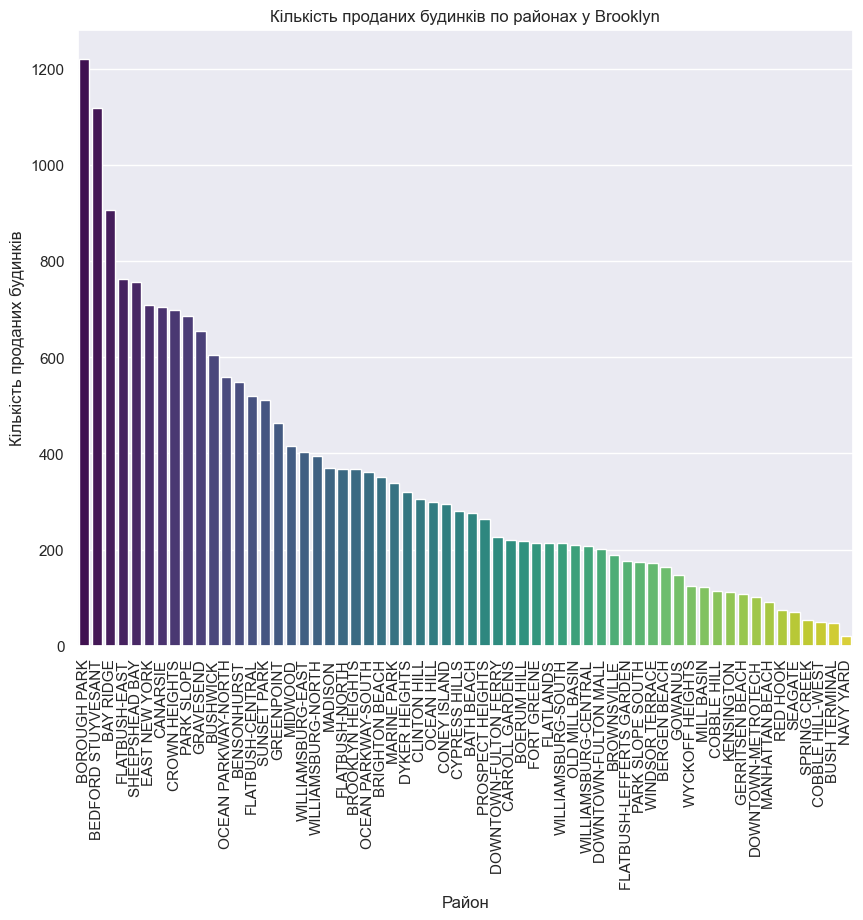

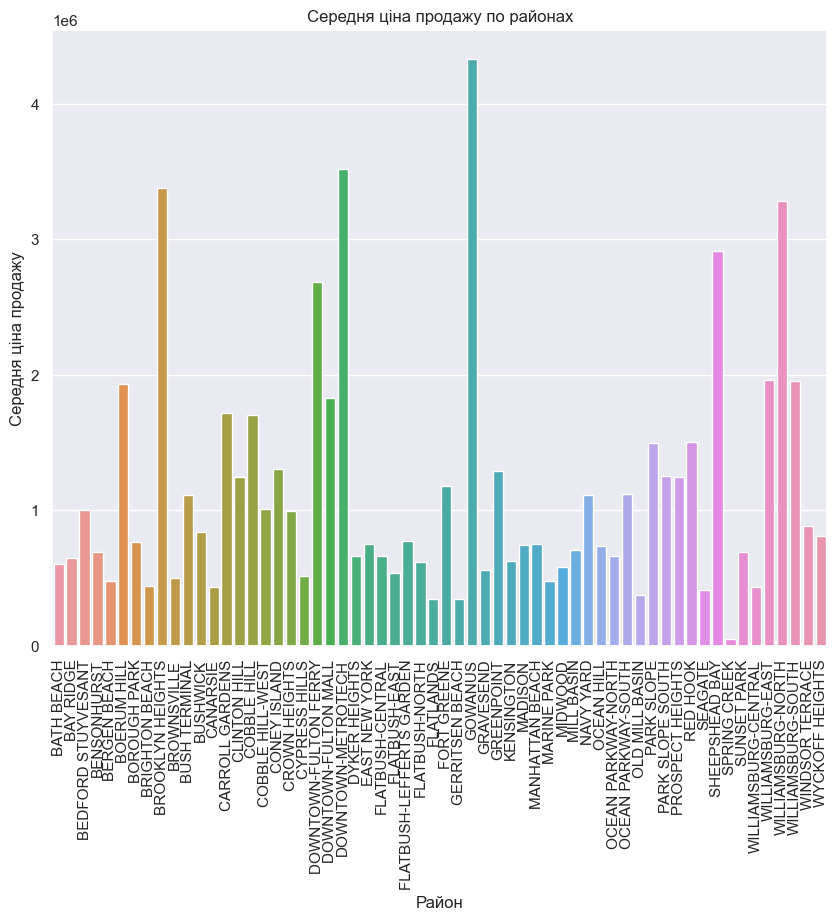

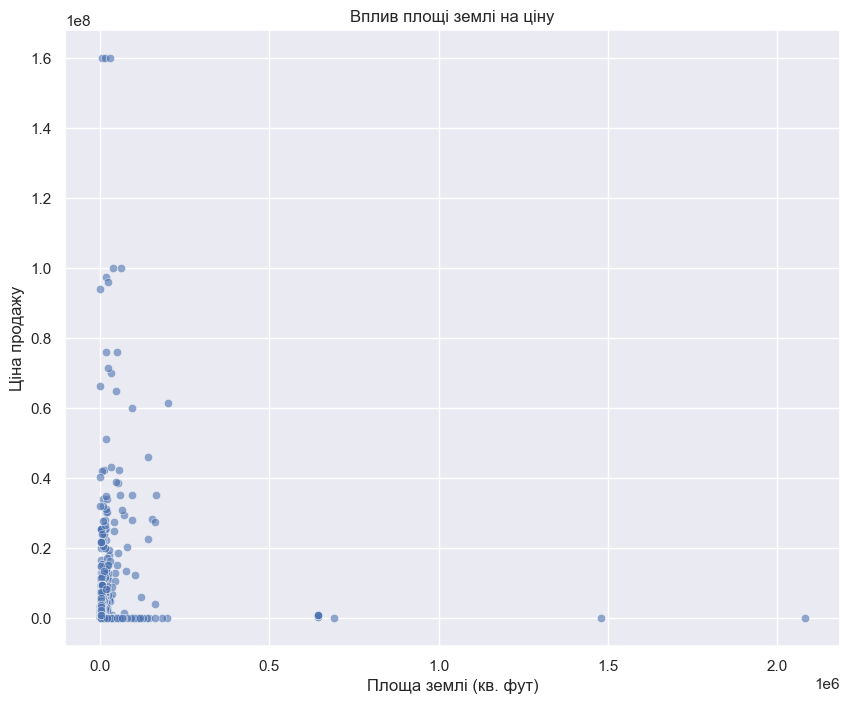

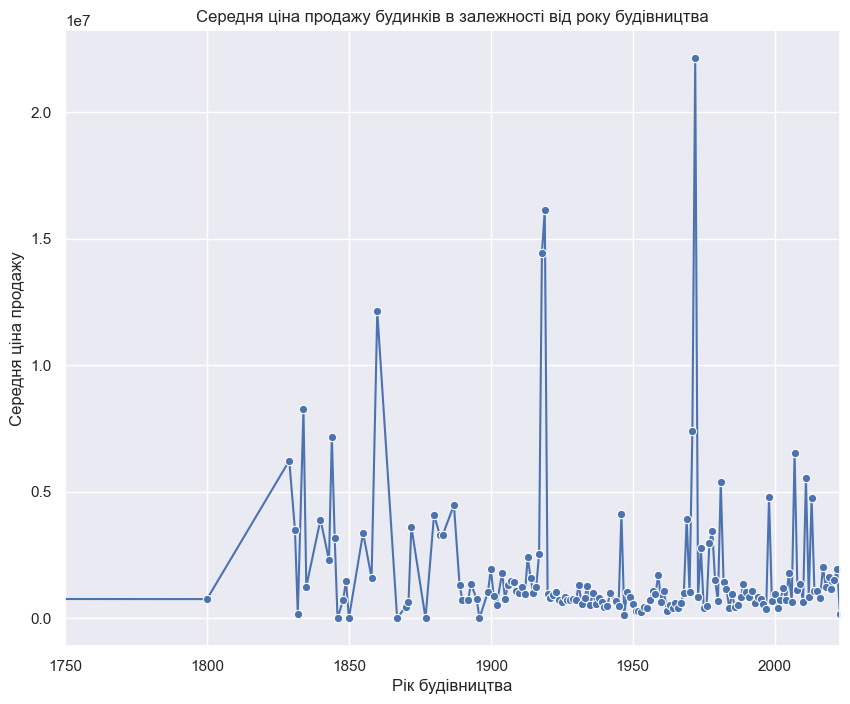

C:\Users\andre\AppData\Local\Temp\ipykernel_13772\2652970647.py:32: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x='TAX CLASS AT TIME OF SALE', y='SALE PRICE', data=df_brooklyn, palette='viridis')


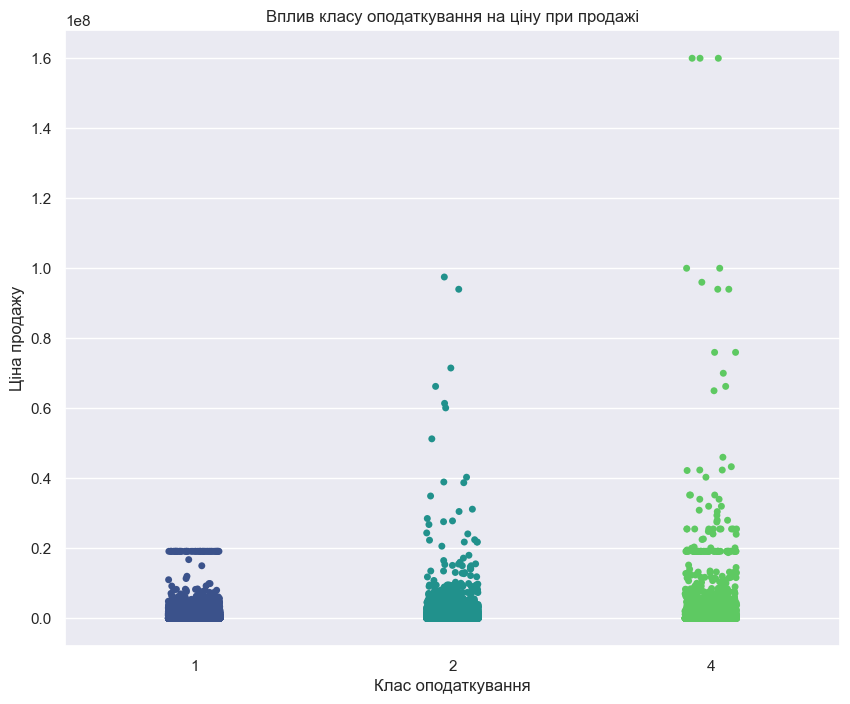

C:\Users\andre\AppData\Local\Temp\ipykernel_13772\2652970647.py:38: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x='TAX CLASS AT PRESENT', y='SALE PRICE', data=df_brooklyn, palette='viridis')


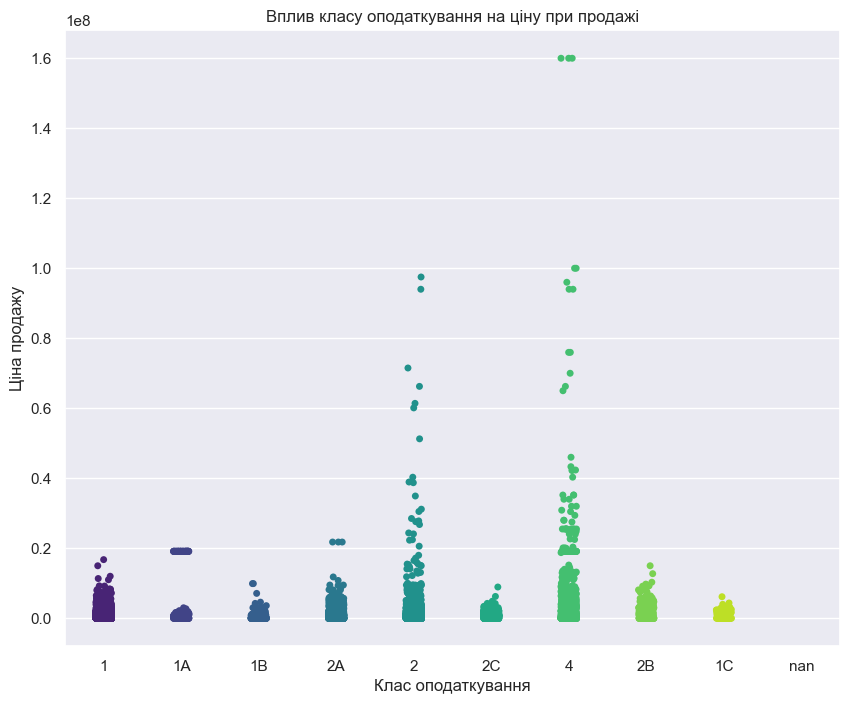

C:\Users\andre\AppData\Local\Temp\ipykernel_13772\2652970647.py:47: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x='BUILDING CLASS AT TIME OF SALE', y='SALE PRICE', data=df_top_25_classes, palette='viridis', jitter=True)


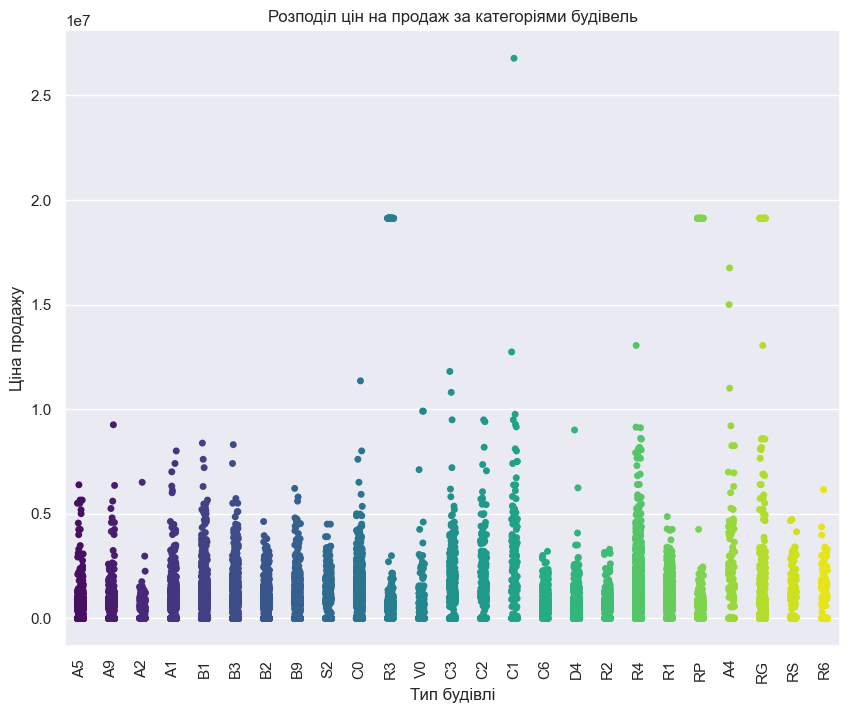

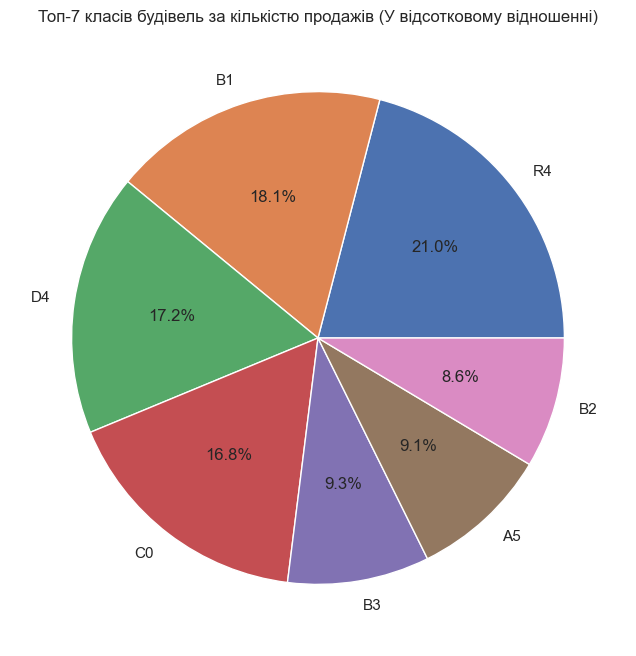

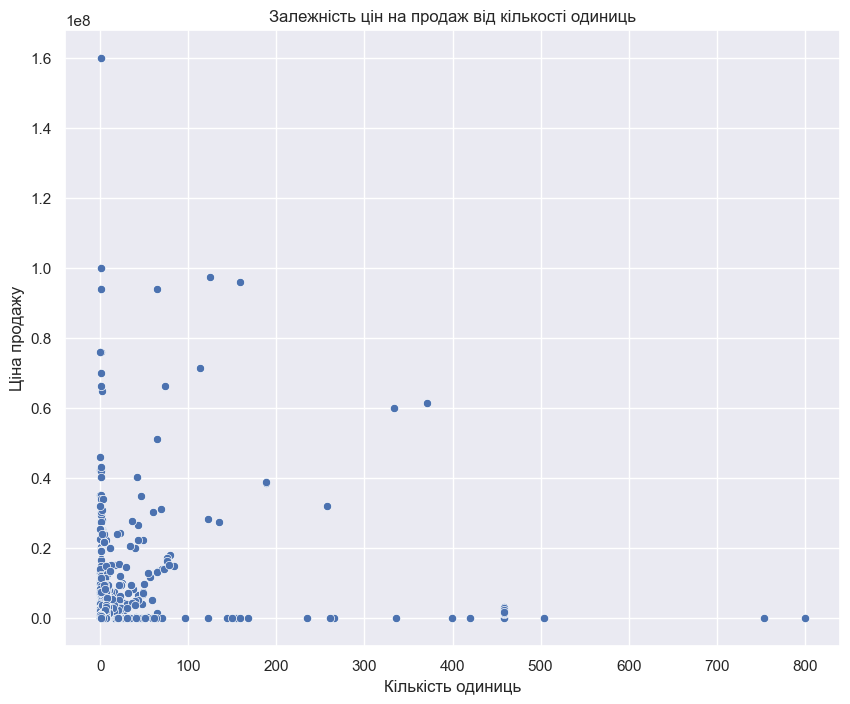

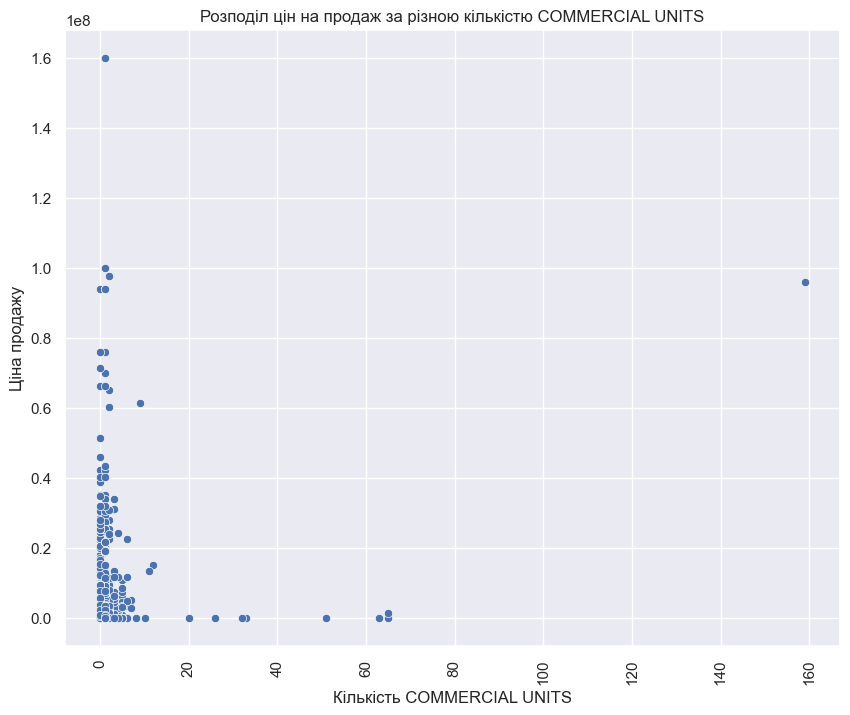

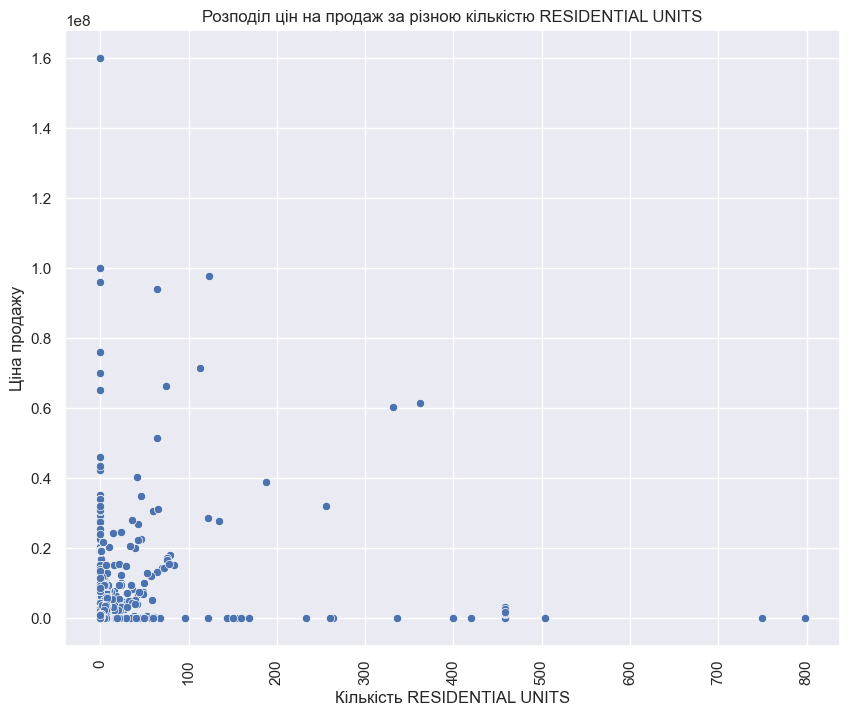

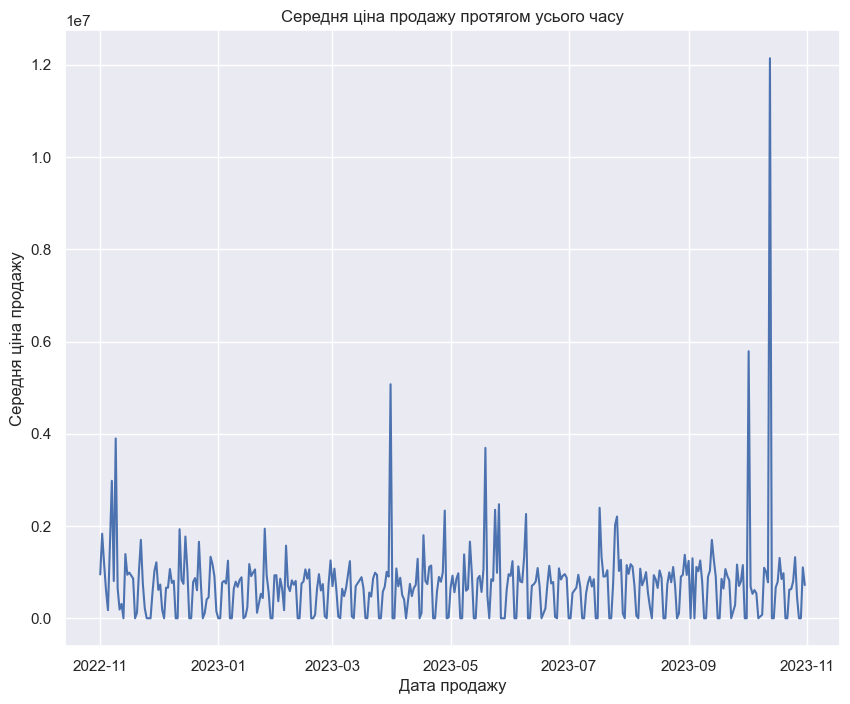

In [28]:
neighborhood_counts = df_brooklyn['NEIGHBORHOOD'].value_counts()

sns.barplot(x=neighborhood_counts.index, y=neighborhood_counts.values, palette='viridis')
plt.title('Кількість проданих будинків по районах у Brooklyn')
plt.xlabel('Район')
plt.ylabel('Кількість проданих будинків')
plt.xticks(rotation=90)
plt.show()

sns.barplot(x='NEIGHBORHOOD', y='SALE PRICE', data=df_brooklyn, errorbar=None, estimator='mean')
plt.title('Середня ціна продажу по районах')
plt.xlabel('Район')
plt.ylabel('Середня ціна продажу')
plt.xticks(rotation=90)
plt.show()

sns.scatterplot(x='LAND SQUARE FEET', y='SALE PRICE', data=df_brooklyn, alpha=0.6)
plt.title('Вплив площі землі на ціну')
plt.xlabel('Площа землі (кв. фут)')
plt.ylabel('Ціна продажу')
plt.show()

mean_prices = df_brooklyn.groupby('YEAR BUILT')['SALE PRICE'].mean().reset_index()

ax = sns.lineplot(x='YEAR BUILT', y='SALE PRICE', data=mean_prices, marker='o')
ax.set_xlim(1750, 2023)
plt.title('Середня ціна продажу будинків в залежності від року будівництва')
plt.xlabel('Рік будівництва')
plt.ylabel('Середня ціна продажу')
plt.show()

sns.stripplot(x='TAX CLASS AT TIME OF SALE', y='SALE PRICE', data=df_brooklyn, palette='viridis')
plt.title('Вплив класу оподаткування на ціну при продажі')
plt.xlabel('Клас оподаткування')
plt.ylabel('Ціна продажу')
plt.show()

sns.stripplot(x='TAX CLASS AT PRESENT', y='SALE PRICE', data=df_brooklyn, palette='viridis')
plt.title('Вплив класу оподаткування на ціну при продажі')
plt.xlabel('Клас оподаткування')
plt.ylabel('Ціна продажу')
plt.show()

top_25_classes = df_brooklyn['BUILDING CLASS AT TIME OF SALE'].value_counts().nlargest(25).index
df_top_25_classes = df_brooklyn[df_brooklyn['BUILDING CLASS AT TIME OF SALE'].isin(top_25_classes)]

sns.stripplot(x='BUILDING CLASS AT TIME OF SALE', y='SALE PRICE', data=df_top_25_classes, palette='viridis', jitter=True)
plt.title('Розподіл цін на продаж за категоріями будівель')
plt.xlabel('Тип будівлі')
plt.ylabel('Ціна продажу')
plt.xticks(rotation=90)
plt.show()

top_7_classes = df_brooklyn['BUILDING CLASS AT TIME OF SALE'].value_counts().nlargest(7)

plt.pie(top_7_classes, labels=top_7_classes.index, autopct='%1.1f%%')
plt.title('Топ-7 класів будівель за кількістю продажів (У відсотковому відношенні)')
plt.show()

sns.scatterplot(x='TOTAL UNITS', y='SALE PRICE', data=df_brooklyn)
plt.title('Залежність цін на продаж від кількості одиниць')
plt.xlabel('Кількість одиниць')
plt.ylabel('Ціна продажу')
plt.show()

sns.scatterplot(x='COMMERCIAL UNITS', y='SALE PRICE', data=df_brooklyn)
plt.title('Розподіл цін на продаж за різною кількістю COMMERCIAL UNITS')
plt.xlabel('Кількість COMMERCIAL UNITS')
plt.ylabel('Ціна продажу')
plt.xticks(rotation=90)
plt.show()

sns.scatterplot(x='RESIDENTIAL UNITS', y='SALE PRICE', data=df_brooklyn)
plt.title('Розподіл цін на продаж за різною кількістю RESIDENTIAL UNITS')
plt.xlabel('Кількість RESIDENTIAL UNITS')
plt.ylabel('Ціна продажу')
plt.xticks(rotation=90)
plt.show()

sns.lineplot(x='SALE DATE', y='SALE PRICE', data=df_brooklyn, errorbar=None)
plt.title('Середня ціна продажу протягом усього часу')
plt.xlabel('Дата продажу')
plt.ylabel('Середня ціна продажу')
plt.show()

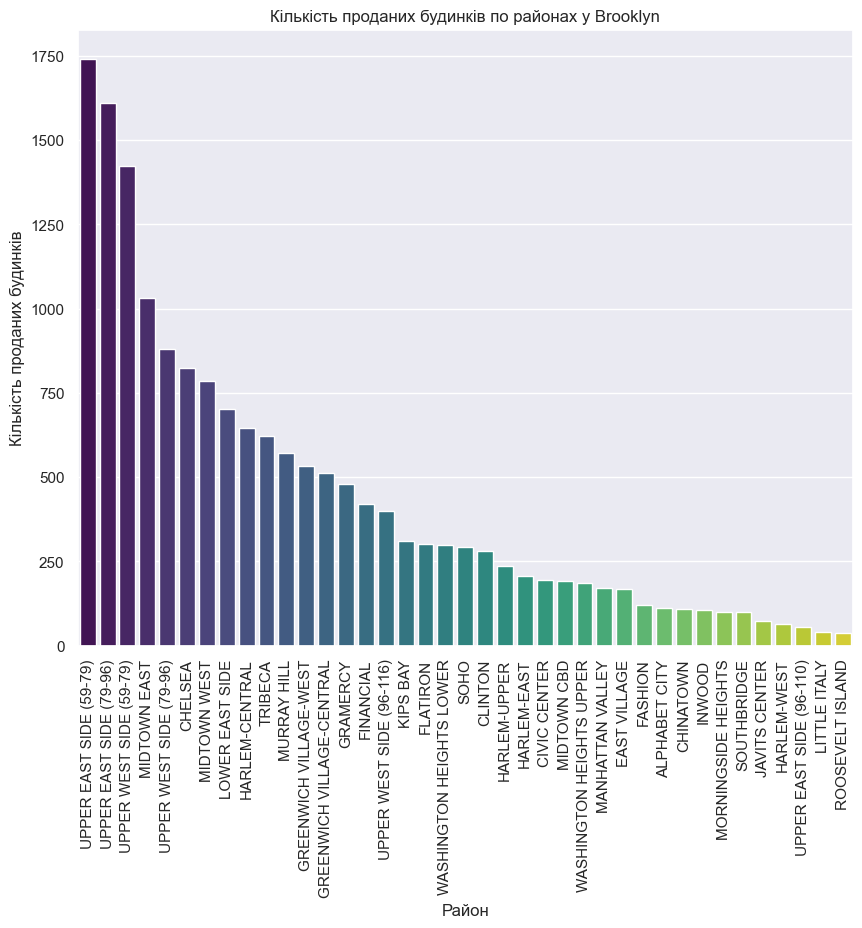

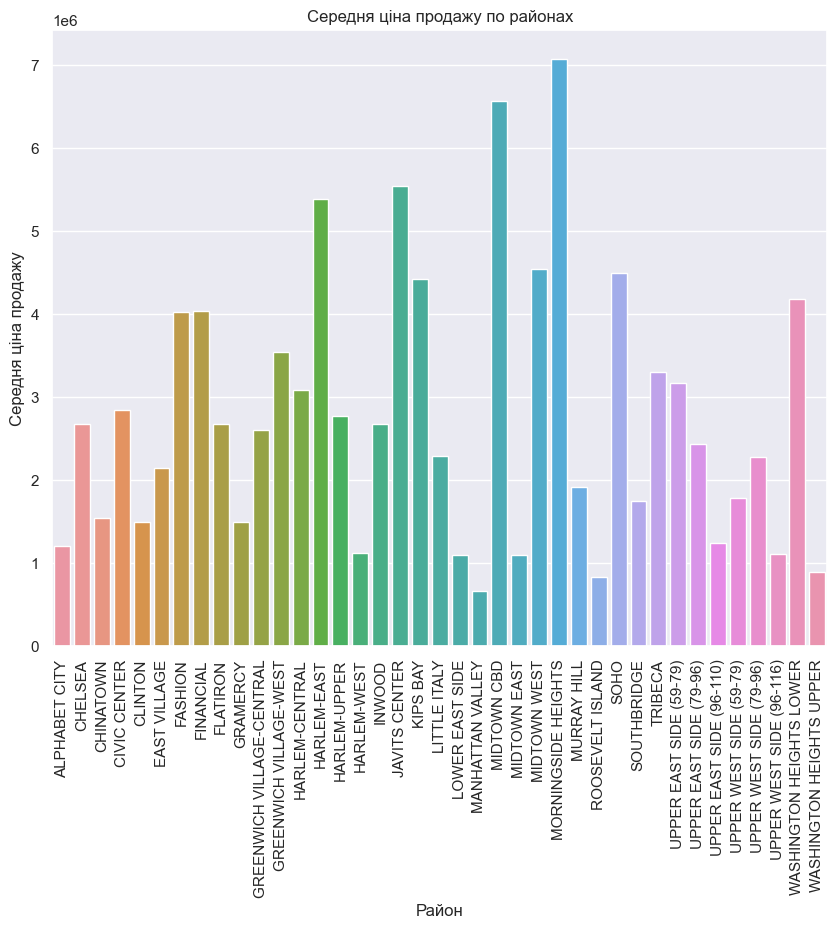

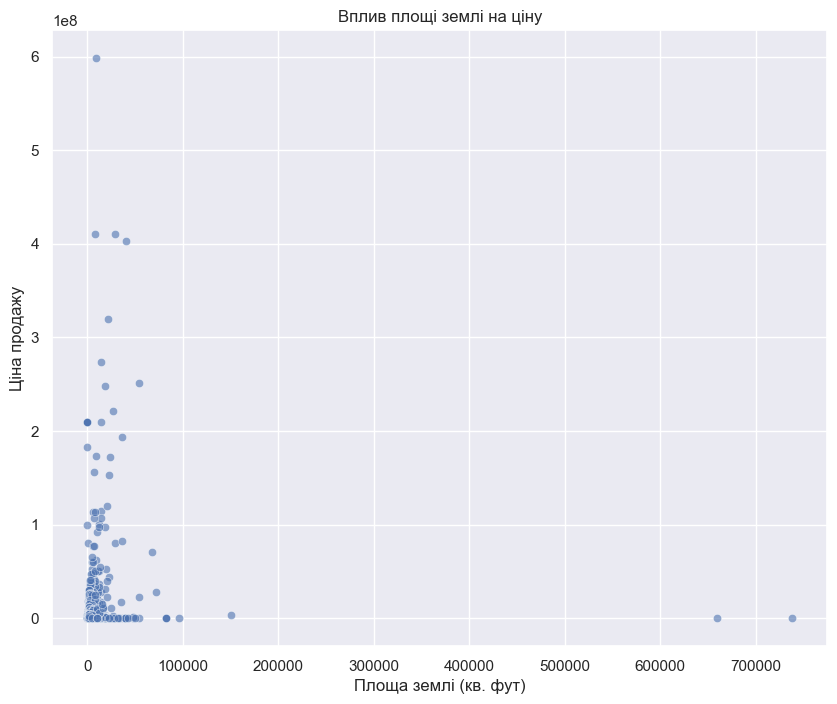

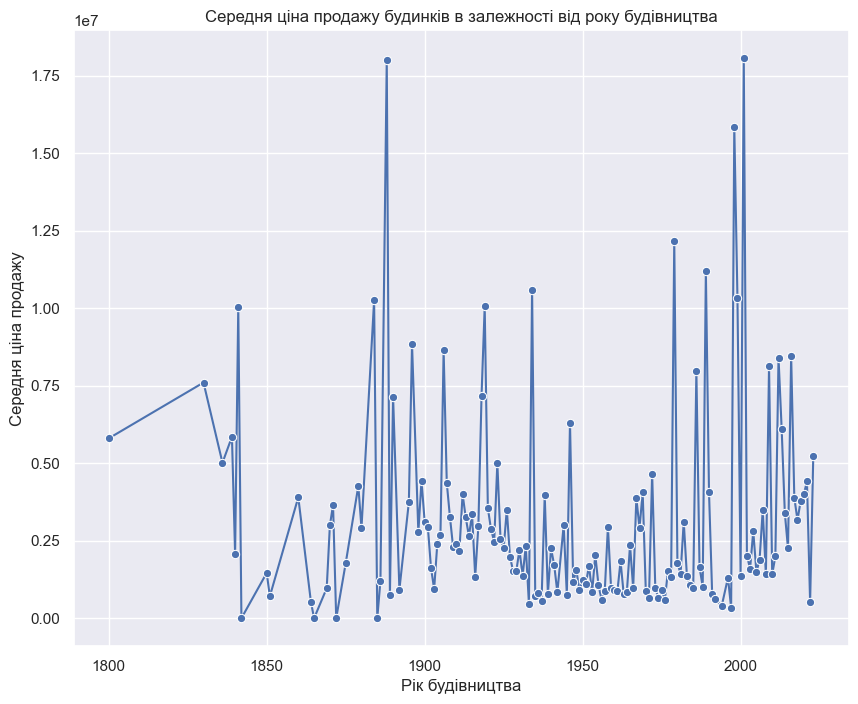

C:\Users\andre\AppData\Local\Temp\ipykernel_13772\634140360.py:34: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x='TAX CLASS AT TIME OF SALE', y='SALE PRICE', data=df_manhattan, palette='viridis')


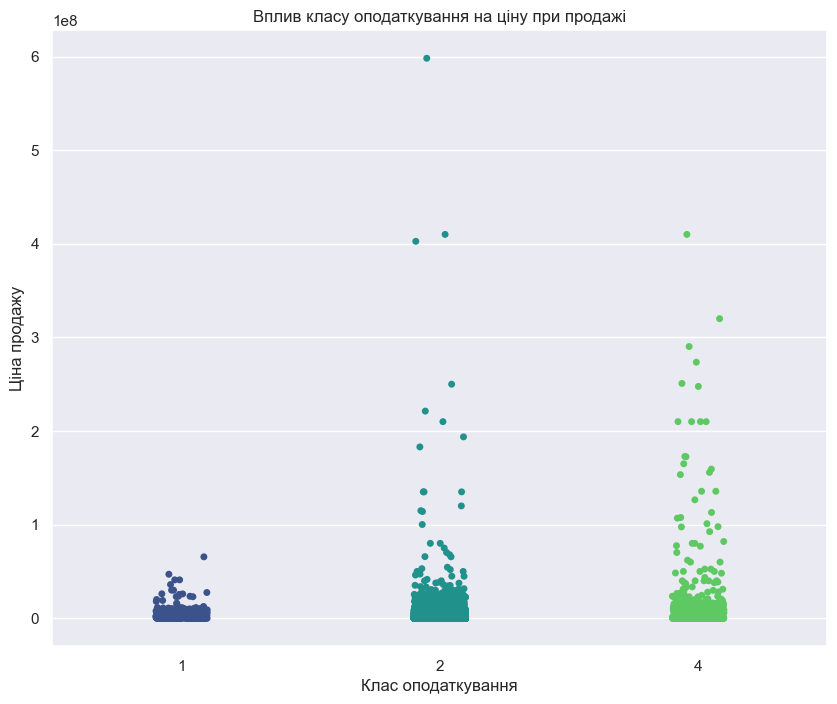

C:\Users\andre\AppData\Local\Temp\ipykernel_13772\634140360.py:40: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x='TAX CLASS AT PRESENT', y='SALE PRICE', data=df_manhattan, palette='viridis')


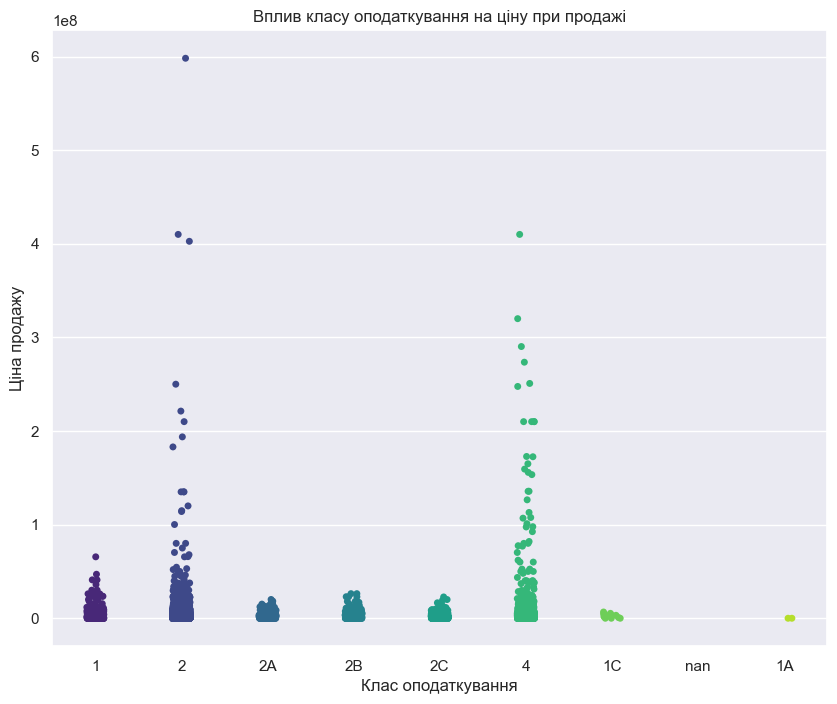

C:\Users\andre\AppData\Local\Temp\ipykernel_13772\634140360.py:49: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x='BUILDING CLASS AT TIME OF SALE', y='SALE PRICE', data=df_top_25_classes, palette='viridis', jitter=True)


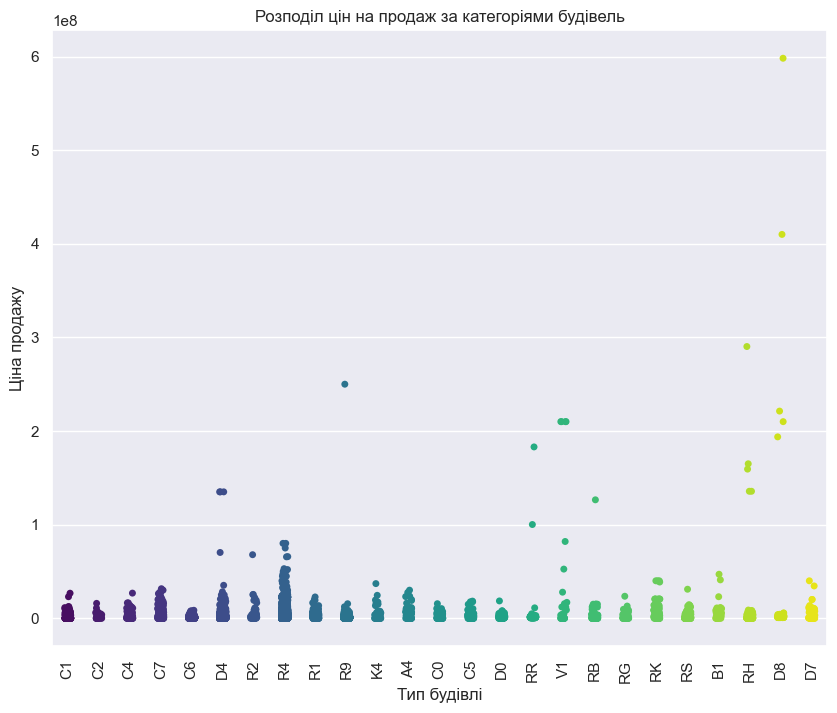

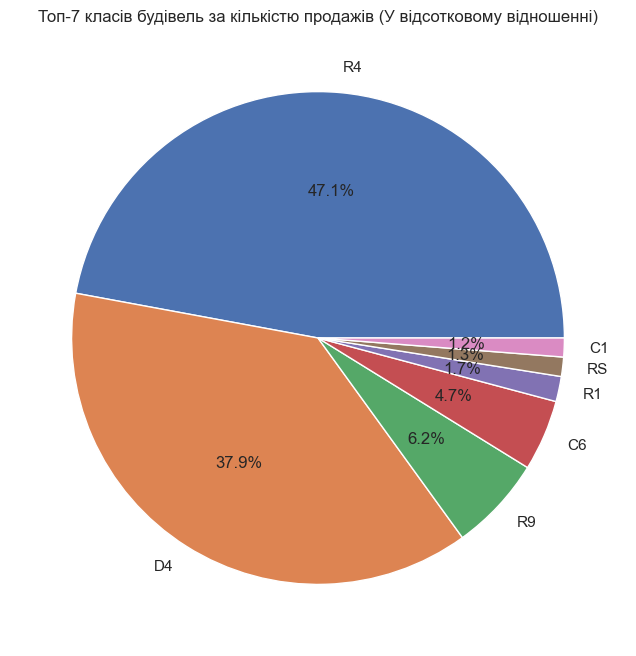

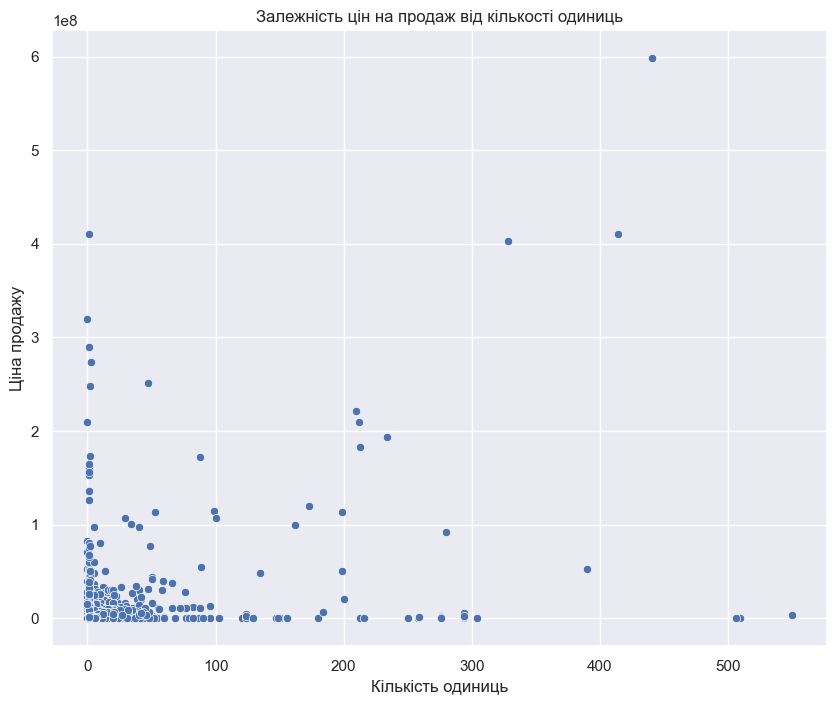

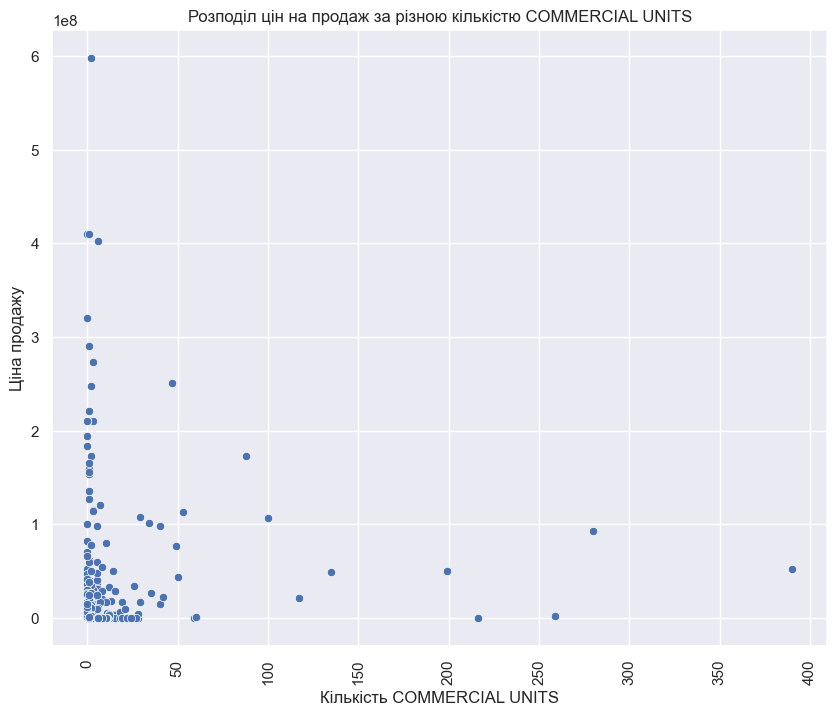

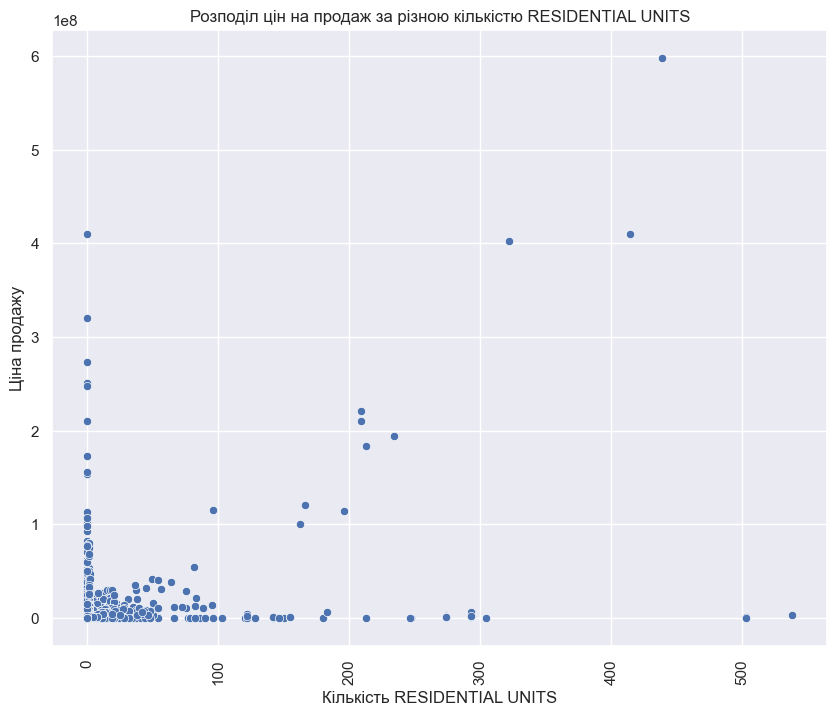

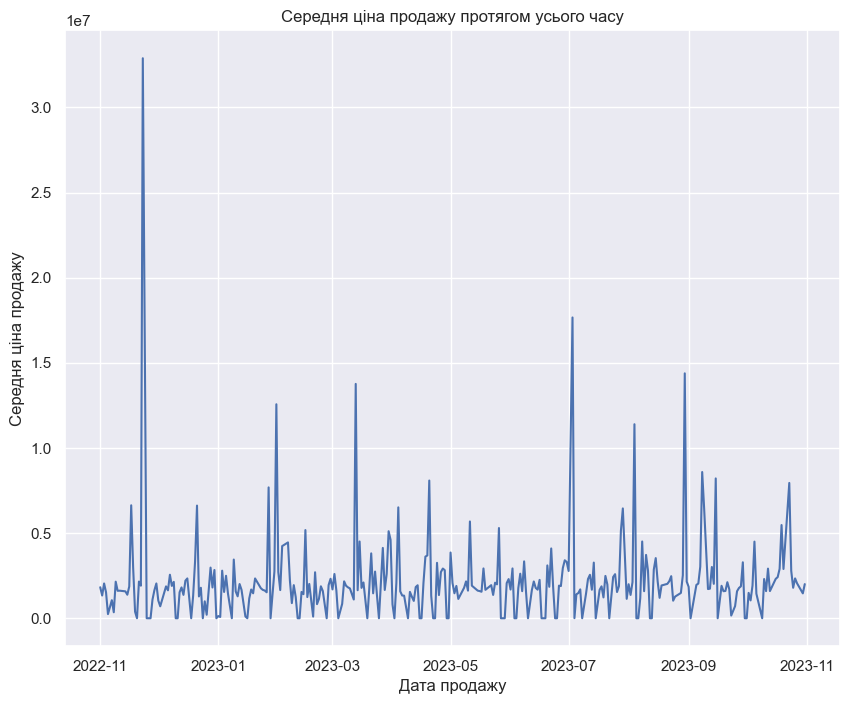

In [23]:
df_manhattan = df[df['DISTRICT'] == 'Manhattan']
df_manhattan

neighborhood_counts = df_manhattan['NEIGHBORHOOD'].value_counts()

sns.barplot(x=neighborhood_counts.index, y=neighborhood_counts.values, palette='viridis')
plt.title('Кількість проданих будинків по районах у Brooklyn')
plt.xlabel('Район')
plt.ylabel('Кількість проданих будинків')
plt.xticks(rotation=90)
plt.show()

sns.barplot(x='NEIGHBORHOOD', y='SALE PRICE', data=df_manhattan, errorbar=None, estimator='mean')
plt.title('Середня ціна продажу по районах')
plt.xlabel('Район')
plt.ylabel('Середня ціна продажу')
plt.xticks(rotation=90)
plt.show()

sns.scatterplot(x='LAND SQUARE FEET', y='SALE PRICE', data=df_manhattan, alpha=0.6)
plt.title('Вплив площі землі на ціну')
plt.xlabel('Площа землі (кв. фут)')
plt.ylabel('Ціна продажу')
plt.show()

mean_prices = df_manhattan.groupby('YEAR BUILT')['SALE PRICE'].mean().reset_index()

sns.lineplot(x='YEAR BUILT', y='SALE PRICE', data=mean_prices, marker='o')
plt.title('Середня ціна продажу будинків в залежності від року будівництва')
plt.xlabel('Рік будівництва')
plt.ylabel('Середня ціна продажу')
plt.show()

sns.stripplot(x='TAX CLASS AT TIME OF SALE', y='SALE PRICE', data=df_manhattan, palette='viridis')
plt.title('Вплив класу оподаткування на ціну при продажі')
plt.xlabel('Клас оподаткування')
plt.ylabel('Ціна продажу')
plt.show()

sns.stripplot(x='TAX CLASS AT PRESENT', y='SALE PRICE', data=df_manhattan, palette='viridis')
plt.title('Вплив класу оподаткування на ціну при продажі')
plt.xlabel('Клас оподаткування')
plt.ylabel('Ціна продажу')
plt.show()

top_25_classes = df_manhattan['BUILDING CLASS AT TIME OF SALE'].value_counts().nlargest(25).index
df_top_25_classes = df_manhattan[df_manhattan['BUILDING CLASS AT TIME OF SALE'].isin(top_25_classes)]

sns.stripplot(x='BUILDING CLASS AT TIME OF SALE', y='SALE PRICE', data=df_top_25_classes, palette='viridis', jitter=True)
plt.title('Розподіл цін на продаж за категоріями будівель')
plt.xlabel('Тип будівлі')
plt.ylabel('Ціна продажу')
plt.xticks(rotation=90)
plt.show()

top_7_classes = df_manhattan['BUILDING CLASS AT TIME OF SALE'].value_counts().nlargest(7)

plt.pie(top_7_classes, labels=top_7_classes.index, autopct='%1.1f%%')
plt.title('Топ-7 класів будівель за кількістю продажів (У відсотковому відношенні)')
plt.show()

sns.scatterplot(x='TOTAL UNITS', y='SALE PRICE', data=df_manhattan)
plt.title('Залежність цін на продаж від кількості одиниць')
plt.xlabel('Кількість одиниць')
plt.ylabel('Ціна продажу')
plt.show()

sns.scatterplot(x='COMMERCIAL UNITS', y='SALE PRICE', data=df_manhattan)
plt.title('Розподіл цін на продаж за різною кількістю COMMERCIAL UNITS')
plt.xlabel('Кількість COMMERCIAL UNITS')
plt.ylabel('Ціна продажу')
plt.xticks(rotation=90)
plt.show()

sns.scatterplot(x='RESIDENTIAL UNITS', y='SALE PRICE', data=df_manhattan)
plt.title('Розподіл цін на продаж за різною кількістю RESIDENTIAL UNITS')
plt.xlabel('Кількість RESIDENTIAL UNITS')
plt.ylabel('Ціна продажу')
plt.xticks(rotation=90)
plt.show()

sns.lineplot(x='SALE DATE', y='SALE PRICE', data=df_manhattan, errorbar=None)
plt.title('Середня ціна продажу протягом усього часу')
plt.xlabel('Дата продажу')
plt.ylabel('Середня ціна продажу')
plt.show()

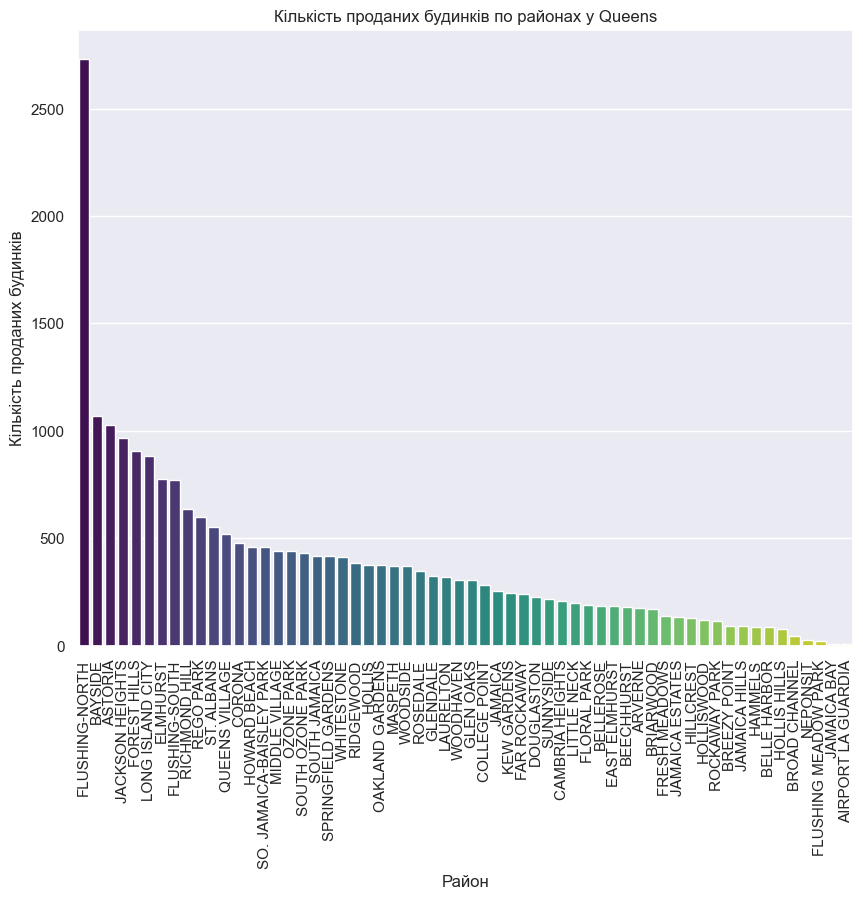

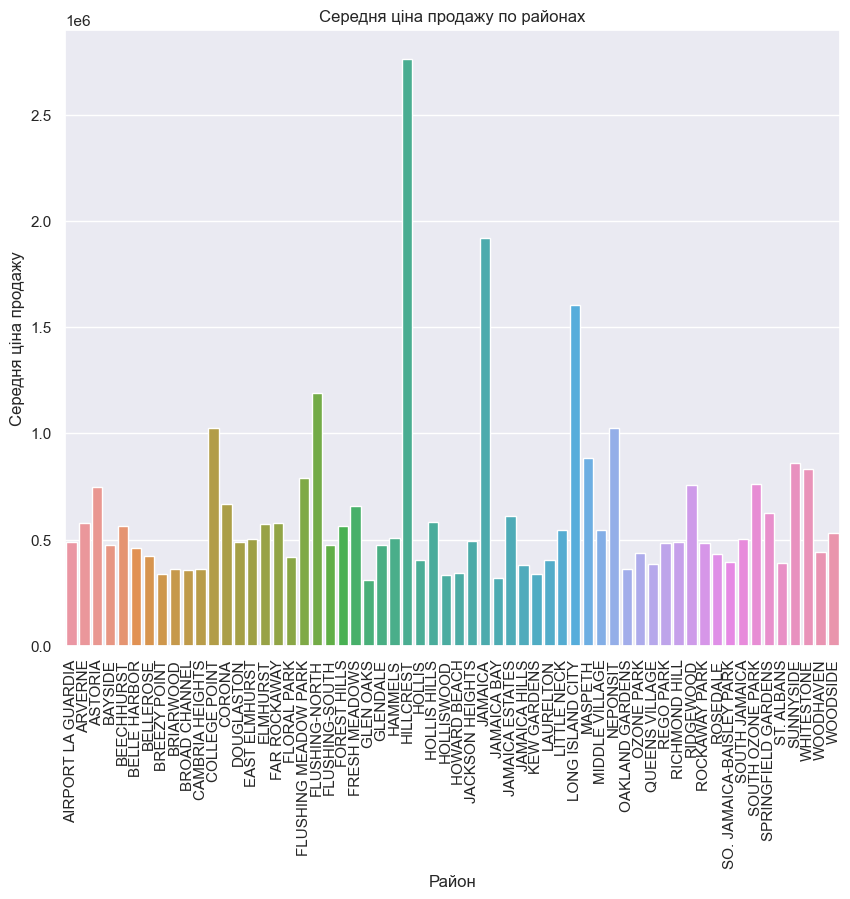

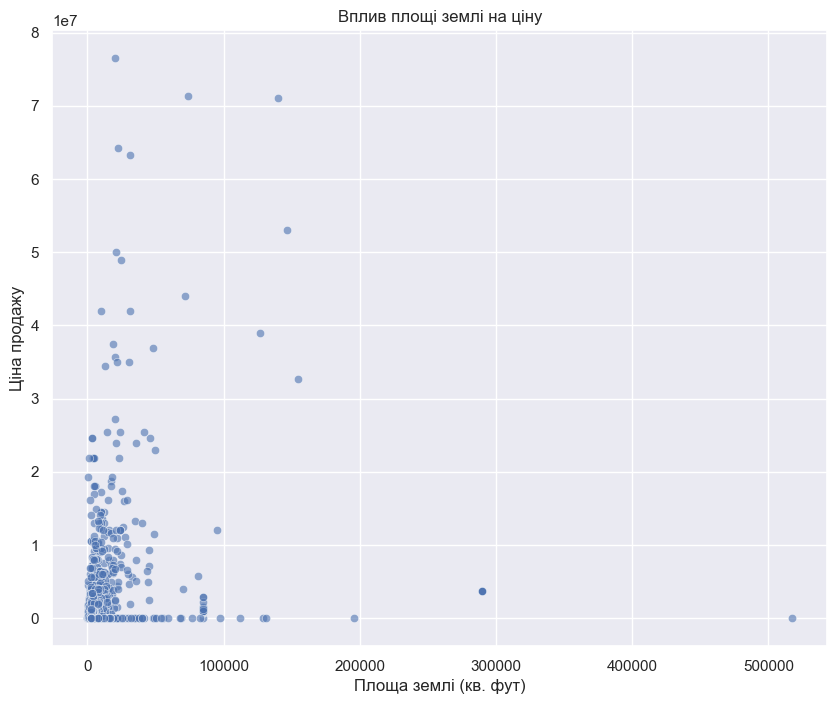

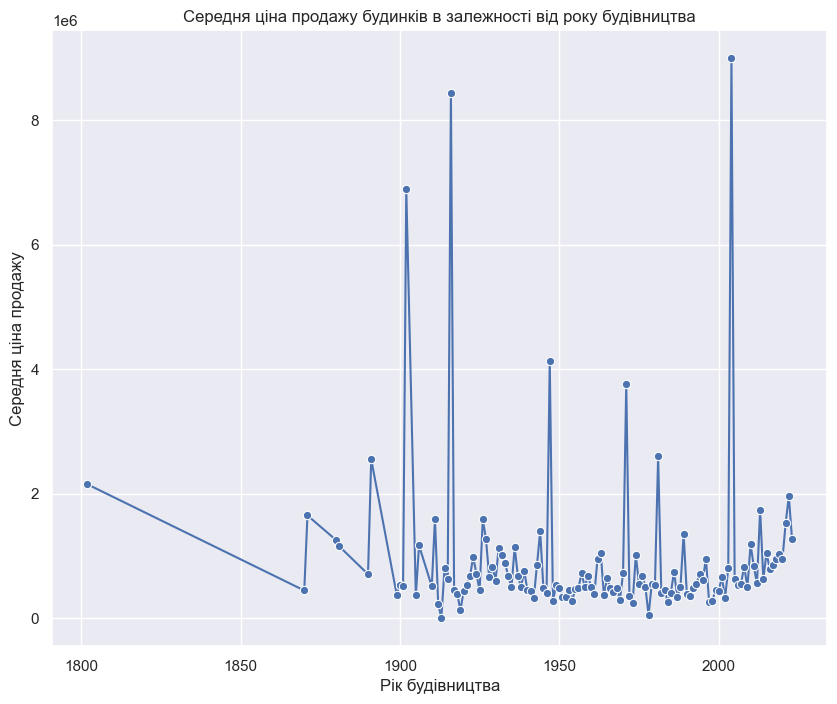

C:\Users\andre\AppData\Local\Temp\ipykernel_13772\931864009.py:34: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x='TAX CLASS AT TIME OF SALE', y='SALE PRICE', data=df_queens, palette='viridis')


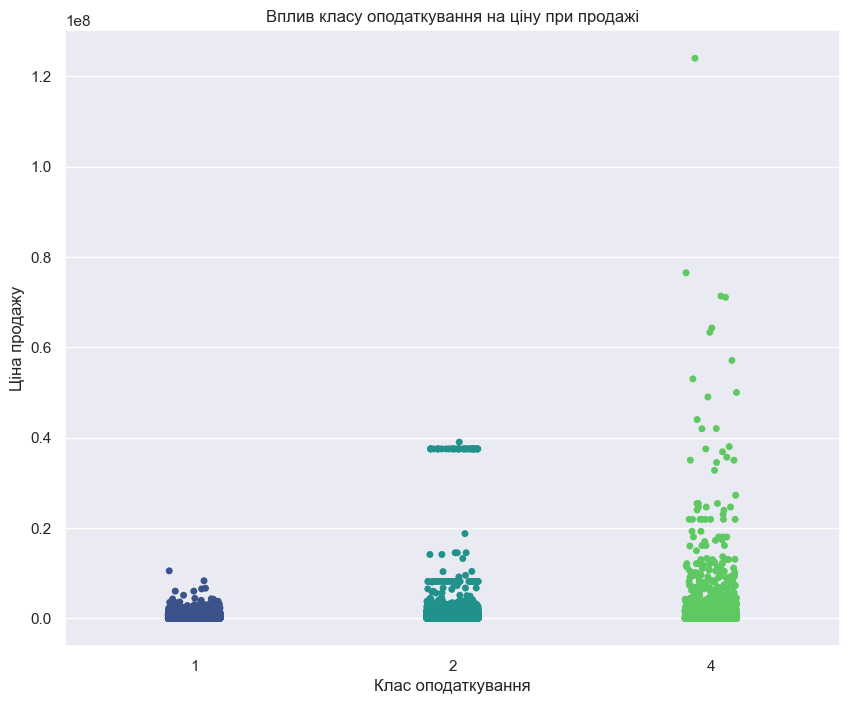

C:\Users\andre\AppData\Local\Temp\ipykernel_13772\931864009.py:40: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x='TAX CLASS AT PRESENT', y='SALE PRICE', data=df_queens, palette='viridis')


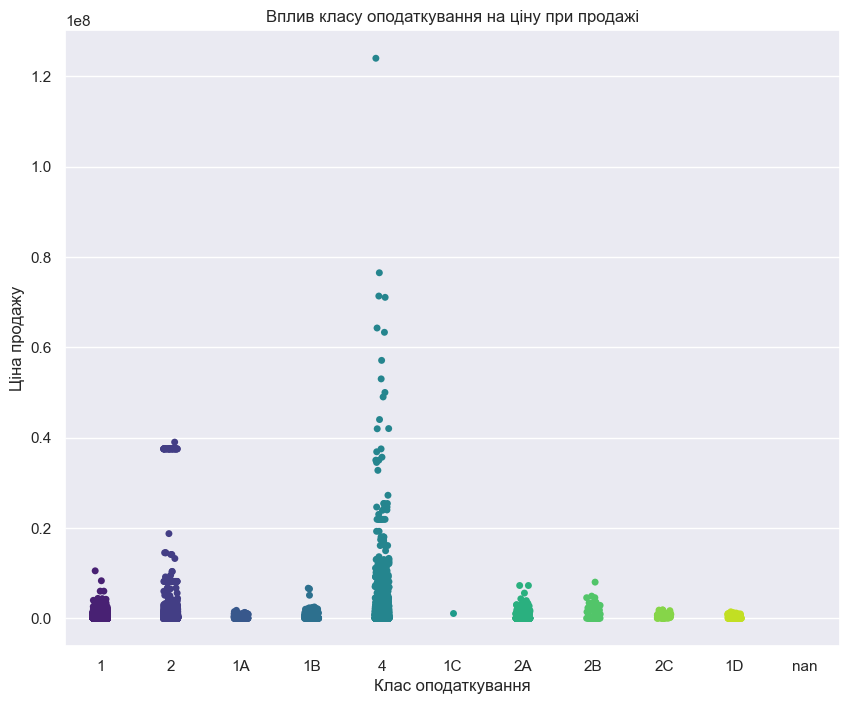

C:\Users\andre\AppData\Local\Temp\ipykernel_13772\931864009.py:49: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x='BUILDING CLASS AT TIME OF SALE', y='SALE PRICE', data=df_top_25_classes, palette='viridis', jitter=True)


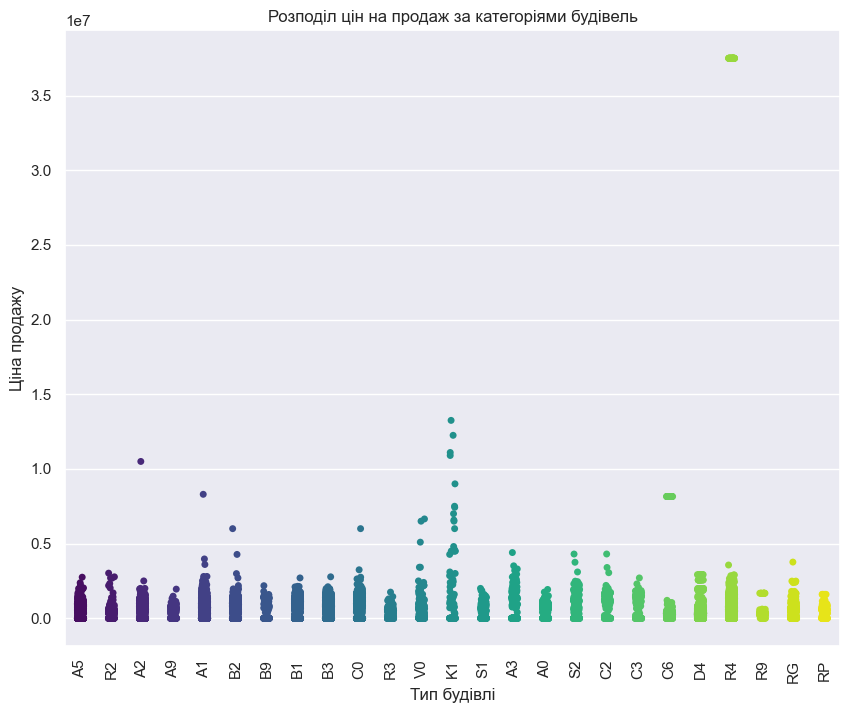

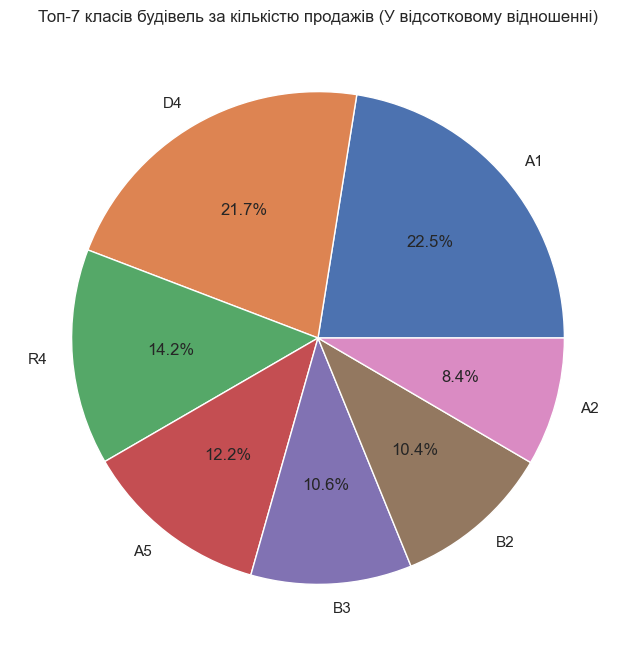

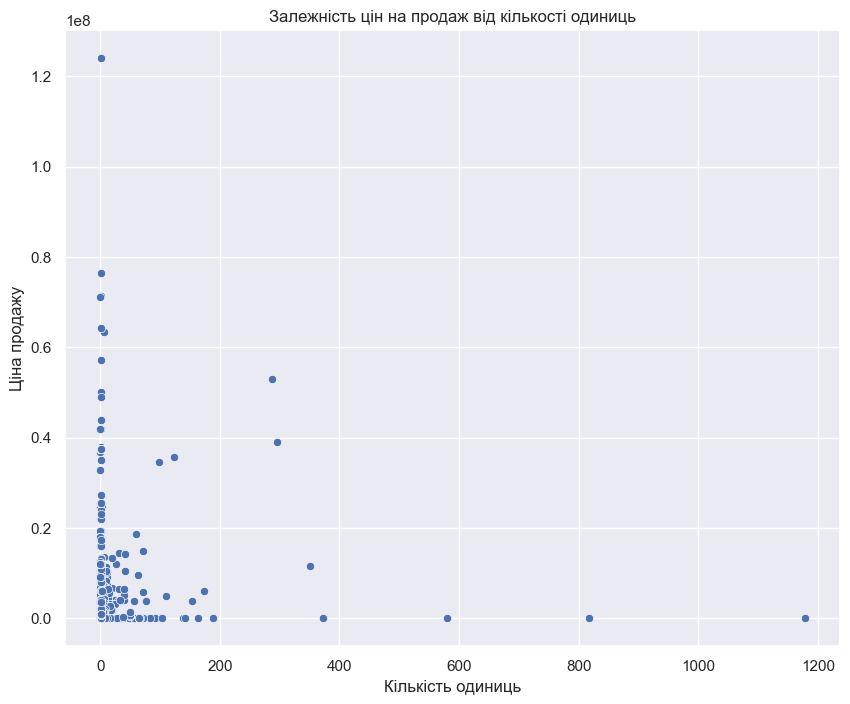

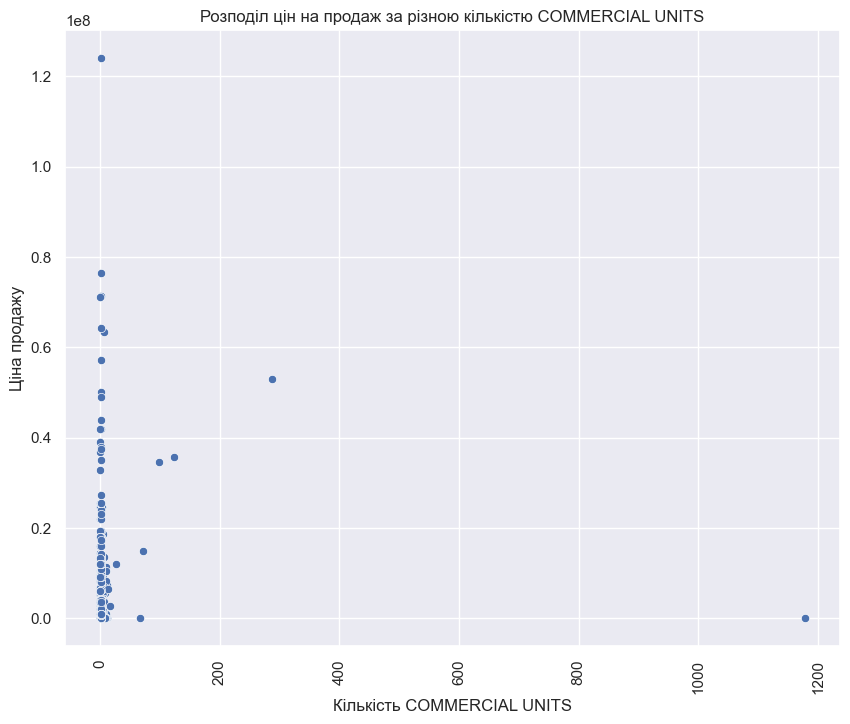

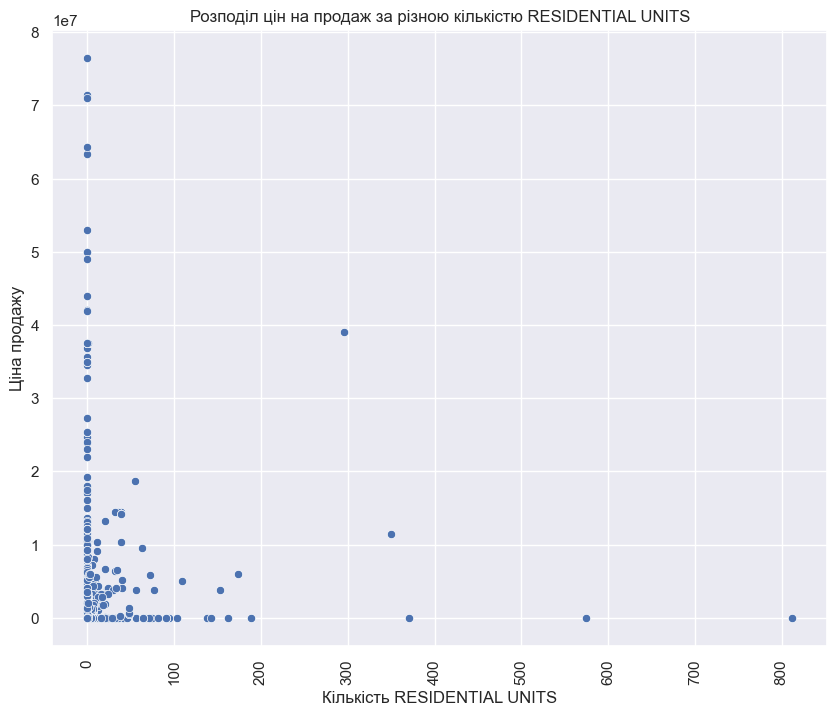

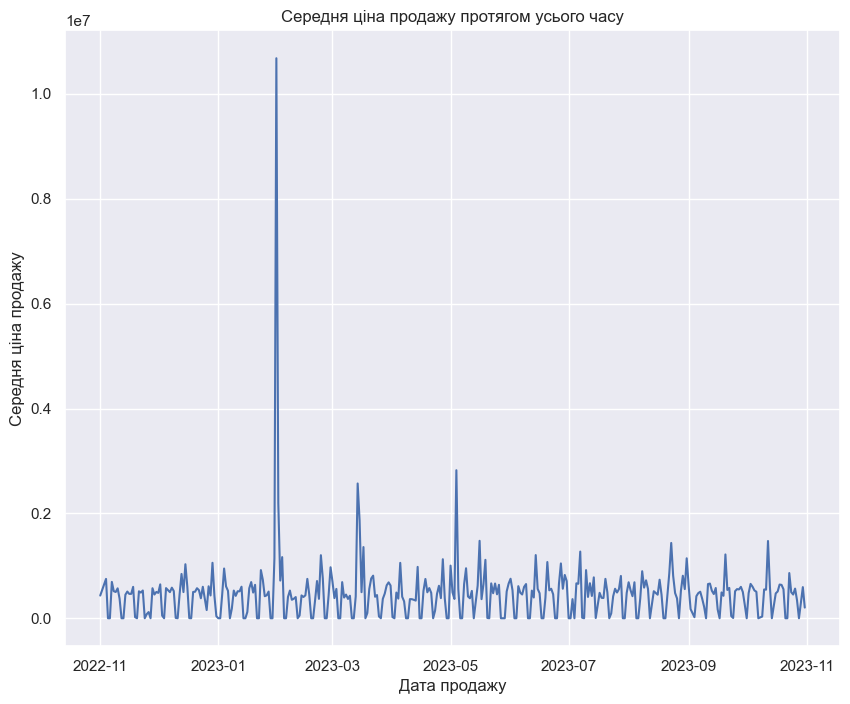

In [24]:
df_queens = df[df['DISTRICT'] == 'Queens']
df_queens

neighborhood_counts = df_queens['NEIGHBORHOOD'].value_counts()

sns.barplot(x=neighborhood_counts.index, y=neighborhood_counts.values, palette='viridis')
plt.title('Кількість проданих будинків по районах у Queens')
plt.xlabel('Район')
plt.ylabel('Кількість проданих будинків')
plt.xticks(rotation=90)
plt.show()

sns.barplot(x='NEIGHBORHOOD', y='SALE PRICE', data=df_queens, errorbar=None, estimator='mean')
plt.title('Середня ціна продажу по районах')
plt.xlabel('Район')
plt.ylabel('Середня ціна продажу')
plt.xticks(rotation=90)
plt.show()

sns.scatterplot(x='LAND SQUARE FEET', y='SALE PRICE', data=df_queens, alpha=0.6)
plt.title('Вплив площі землі на ціну')
plt.xlabel('Площа землі (кв. фут)')
plt.ylabel('Ціна продажу')
plt.show()

mean_prices = df_queens.groupby('YEAR BUILT')['SALE PRICE'].mean().reset_index()

sns.lineplot(x='YEAR BUILT', y='SALE PRICE', data=mean_prices, marker='o')
plt.title('Середня ціна продажу будинків в залежності від року будівництва')
plt.xlabel('Рік будівництва')
plt.ylabel('Середня ціна продажу')
plt.show()

sns.stripplot(x='TAX CLASS AT TIME OF SALE', y='SALE PRICE', data=df_queens, palette='viridis')
plt.title('Вплив класу оподаткування на ціну при продажі')
plt.xlabel('Клас оподаткування')
plt.ylabel('Ціна продажу')
plt.show()

sns.stripplot(x='TAX CLASS AT PRESENT', y='SALE PRICE', data=df_queens, palette='viridis')
plt.title('Вплив класу оподаткування на ціну при продажі')
plt.xlabel('Клас оподаткування')
plt.ylabel('Ціна продажу')
plt.show()

top_25_classes = df_queens['BUILDING CLASS AT TIME OF SALE'].value_counts().nlargest(25).index
df_top_25_classes = df_queens[df_queens['BUILDING CLASS AT TIME OF SALE'].isin(top_25_classes)]

sns.stripplot(x='BUILDING CLASS AT TIME OF SALE', y='SALE PRICE', data=df_top_25_classes, palette='viridis', jitter=True)
plt.title('Розподіл цін на продаж за категоріями будівель')
plt.xlabel('Тип будівлі')
plt.ylabel('Ціна продажу')
plt.xticks(rotation=90)
plt.show()

top_7_classes = df_queens['BUILDING CLASS AT TIME OF SALE'].value_counts().nlargest(7)

plt.pie(top_7_classes, labels=top_7_classes.index, autopct='%1.1f%%')
plt.title('Топ-7 класів будівель за кількістю продажів (У відсотковому відношенні)')
plt.show()

sns.scatterplot(x='TOTAL UNITS', y='SALE PRICE', data=df_queens)
plt.title('Залежність цін на продаж від кількості одиниць')
plt.xlabel('Кількість одиниць')
plt.ylabel('Ціна продажу')
plt.show()

sns.scatterplot(x='COMMERCIAL UNITS', y='SALE PRICE', data=df_queens)
plt.title('Розподіл цін на продаж за різною кількістю COMMERCIAL UNITS')
plt.xlabel('Кількість COMMERCIAL UNITS')
plt.ylabel('Ціна продажу')
plt.xticks(rotation=90)
plt.show()

sns.scatterplot(x='RESIDENTIAL UNITS', y='SALE PRICE', data=df_queens)
plt.title('Розподіл цін на продаж за різною кількістю RESIDENTIAL UNITS')
plt.xlabel('Кількість RESIDENTIAL UNITS')
plt.ylabel('Ціна продажу')
plt.xticks(rotation=90)
plt.show()

sns.lineplot(x='SALE DATE', y='SALE PRICE', data=df_queens, errorbar=None)
plt.title('Середня ціна продажу протягом усього часу')
plt.xlabel('Дата продажу')
plt.ylabel('Середня ціна продажу')
plt.show()

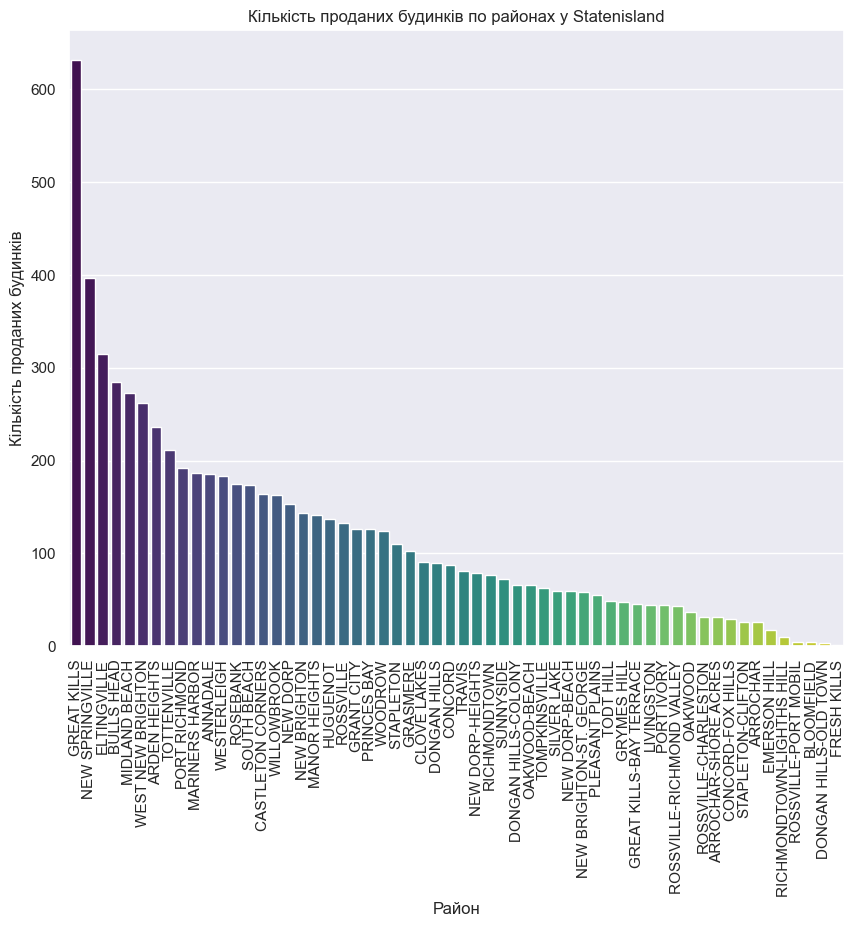

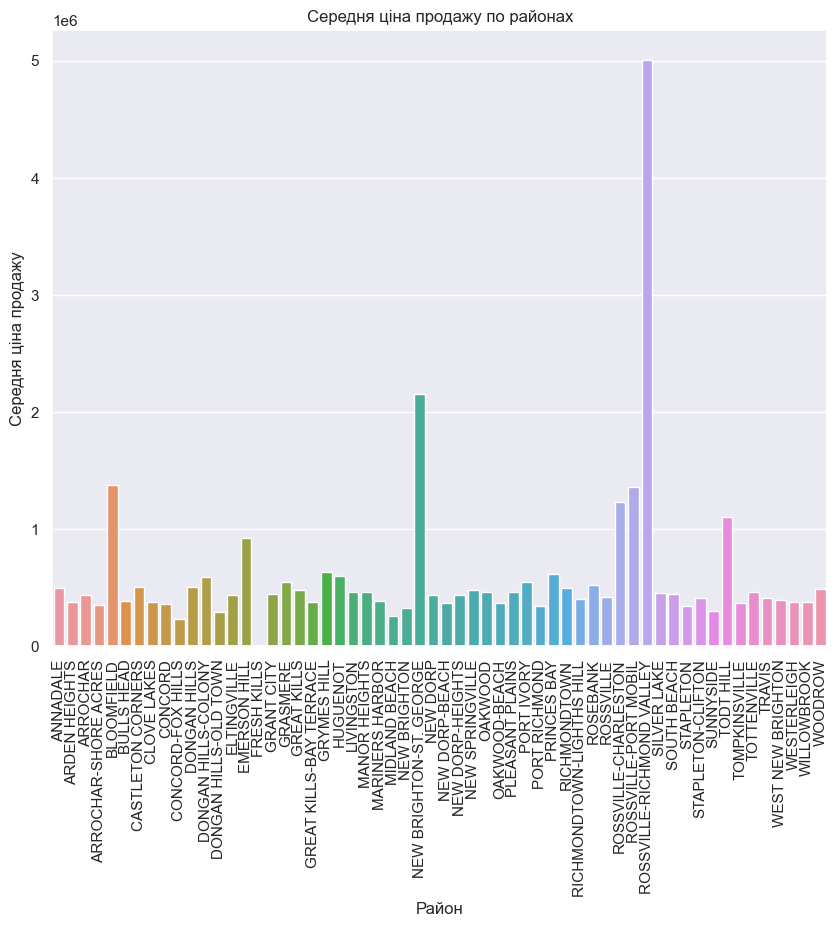

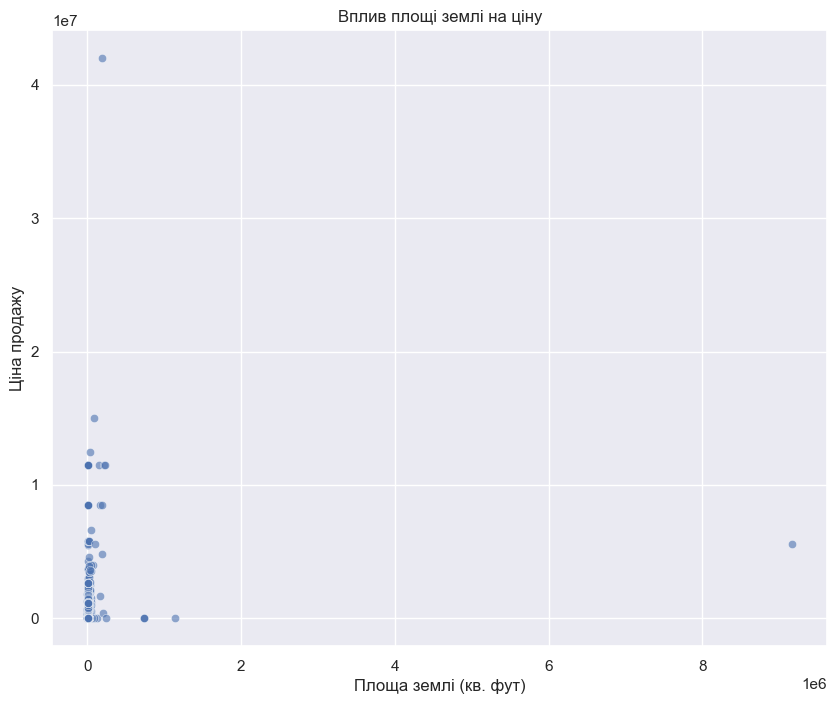

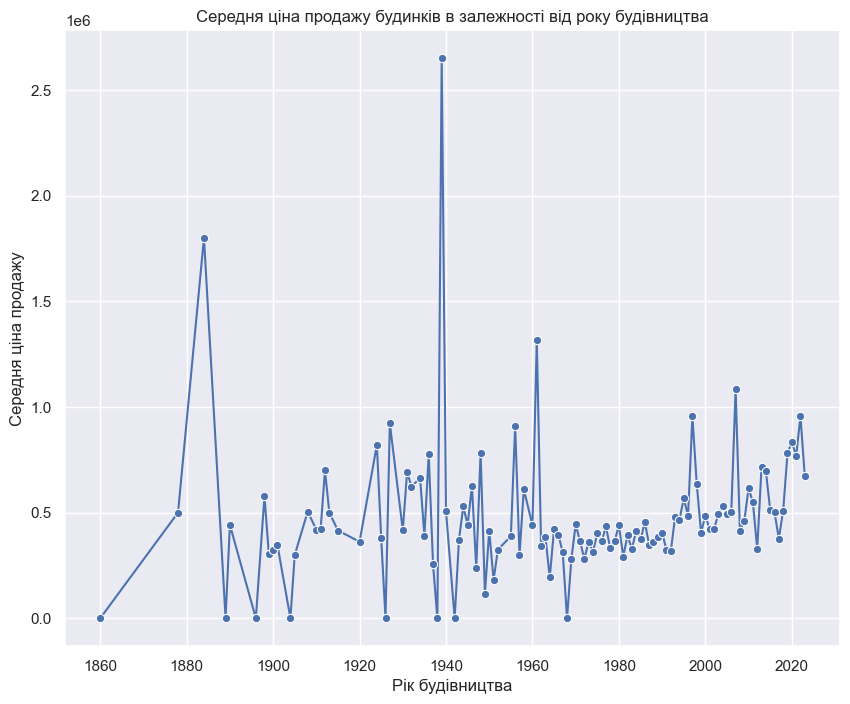

C:\Users\andre\AppData\Local\Temp\ipykernel_13772\2577287648.py:34: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x='TAX CLASS AT TIME OF SALE', y='SALE PRICE', data=df_statenisland, palette='viridis')


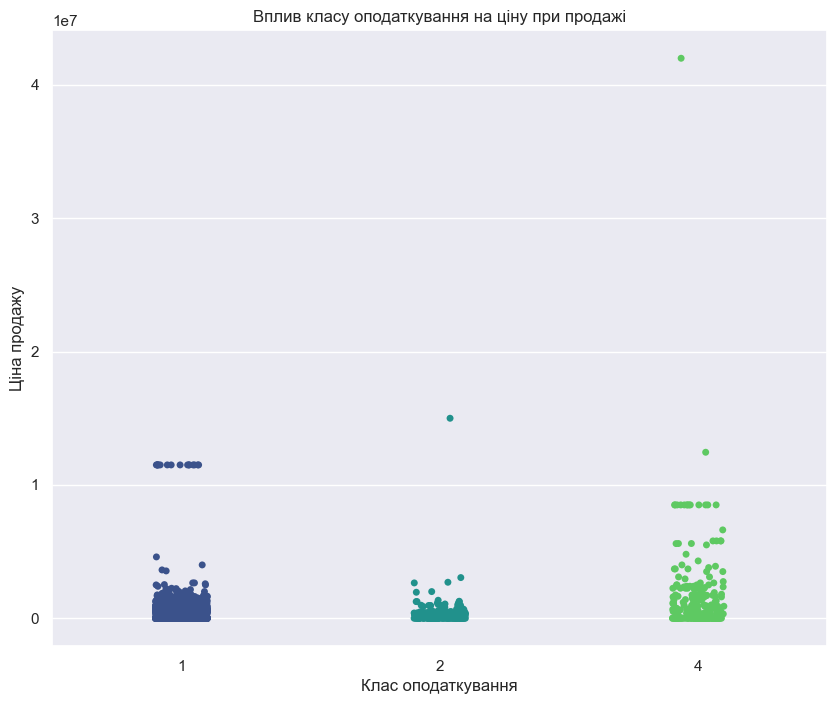

C:\Users\andre\AppData\Local\Temp\ipykernel_13772\2577287648.py:40: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x='TAX CLASS AT PRESENT', y='SALE PRICE', data=df_statenisland, palette='viridis')


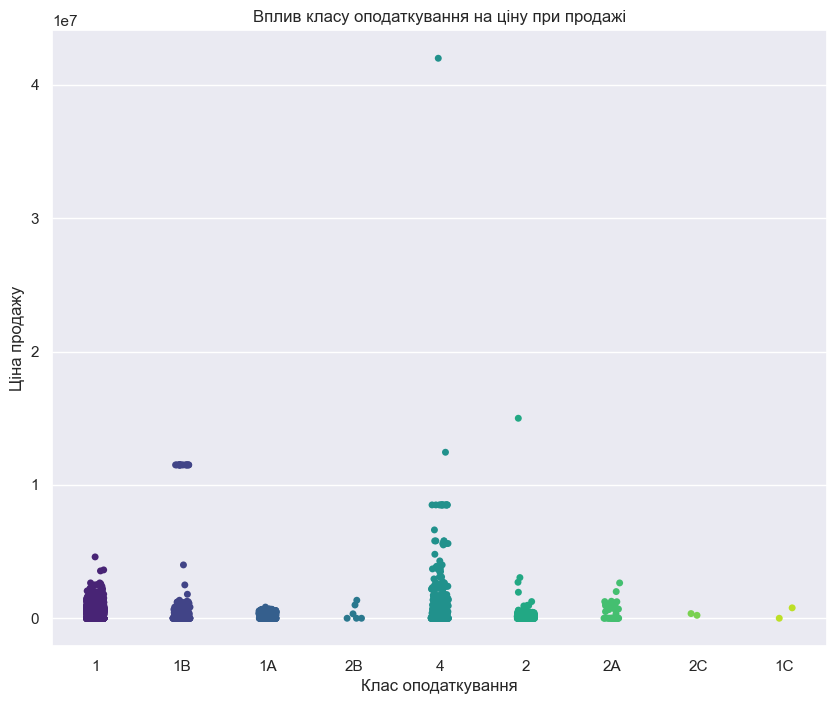

C:\Users\andre\AppData\Local\Temp\ipykernel_13772\2577287648.py:49: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x='BUILDING CLASS AT TIME OF SALE', y='SALE PRICE', data=df_top_25_classes, palette='viridis', jitter=True)


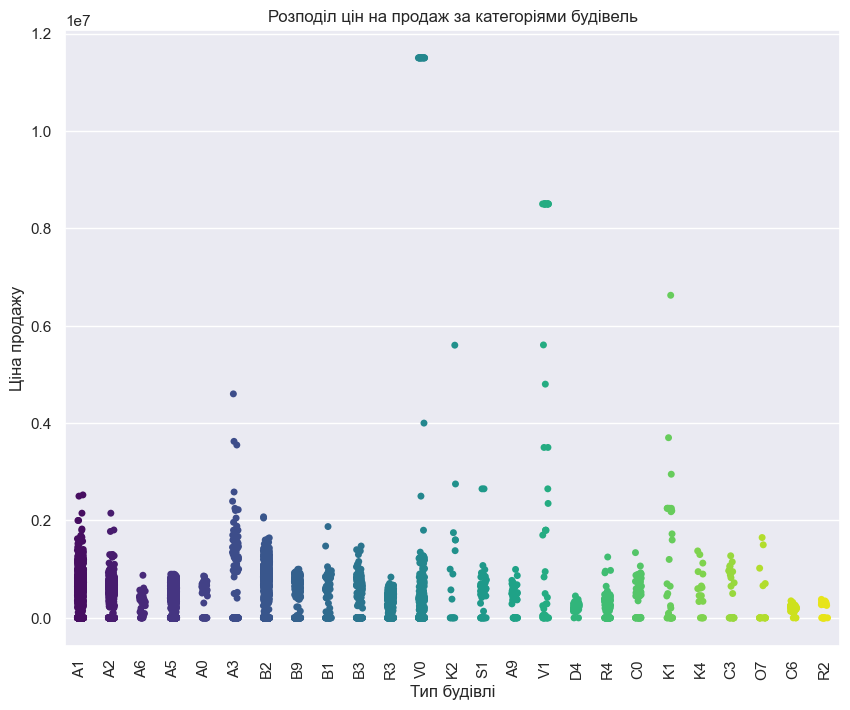

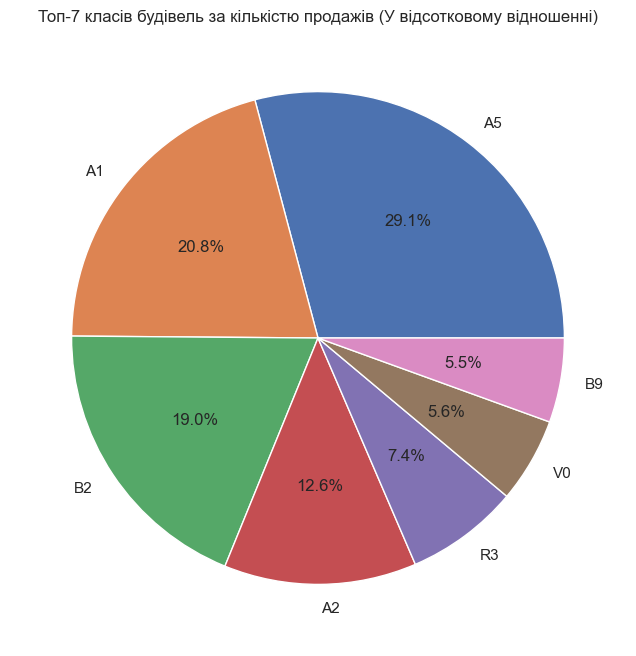

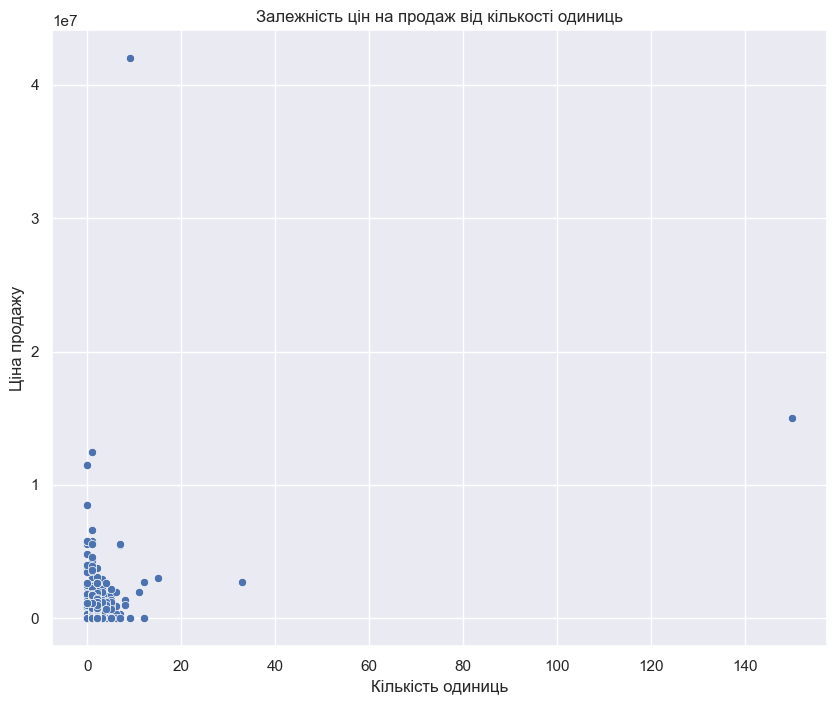

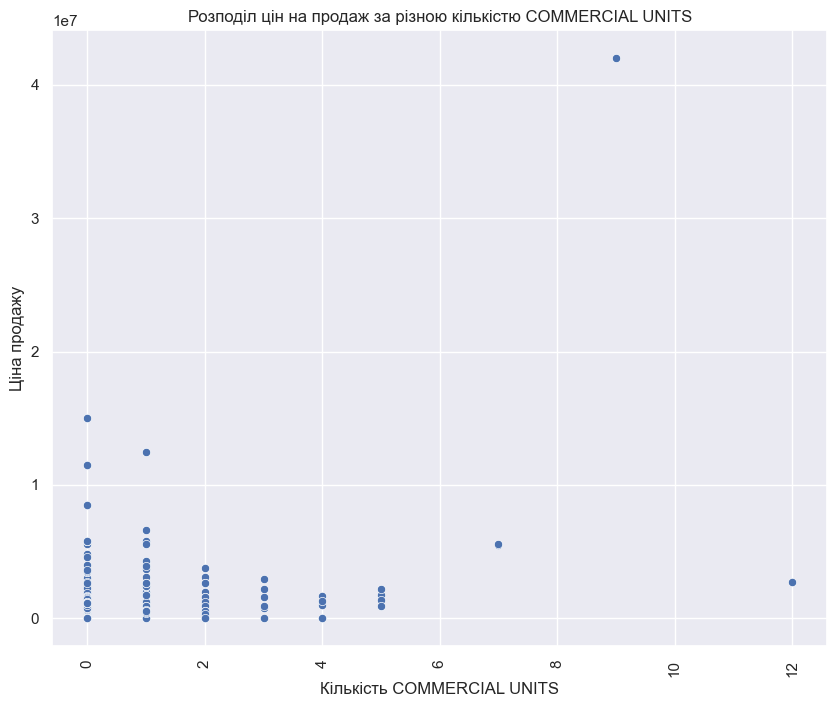

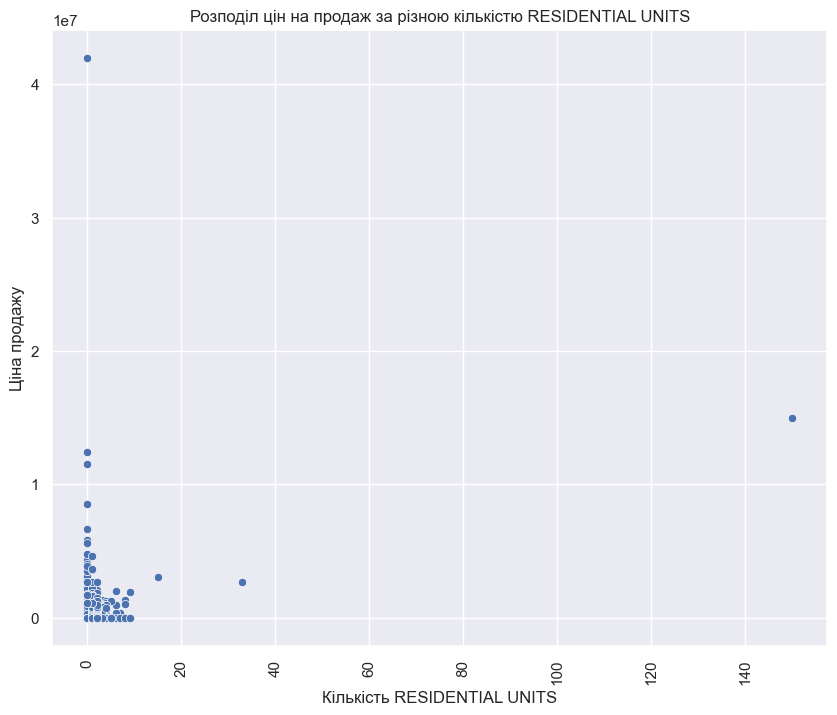

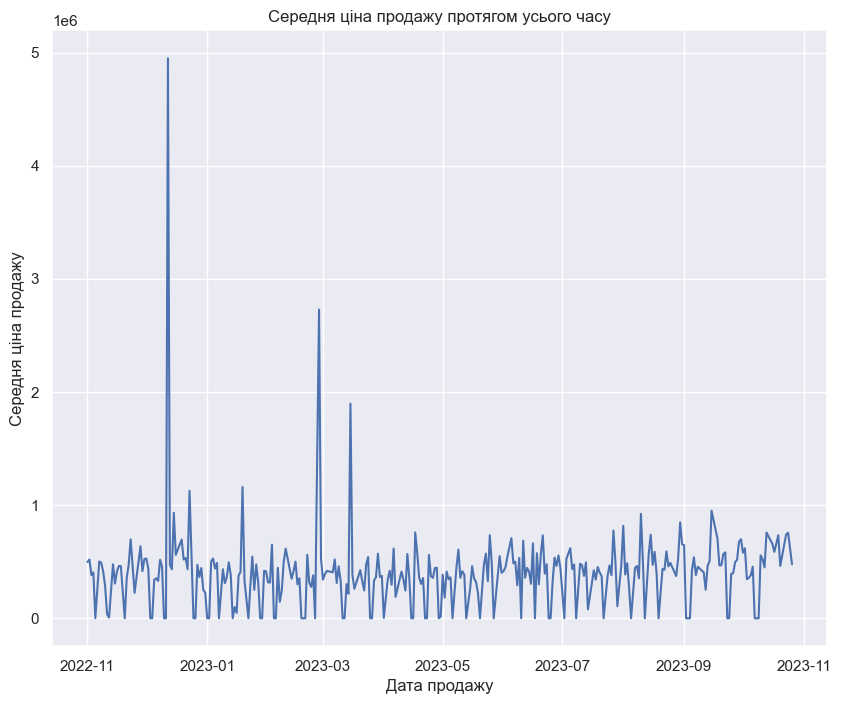

In [25]:
df_statenisland = df[df['DISTRICT'] == 'Statenisland']
df_statenisland

neighborhood_counts = df_statenisland['NEIGHBORHOOD'].value_counts()

sns.barplot(x=neighborhood_counts.index, y=neighborhood_counts.values, palette='viridis')
plt.title('Кількість проданих будинків по районах у Statenisland')
plt.xlabel('Район')
plt.ylabel('Кількість проданих будинків')
plt.xticks(rotation=90)
plt.show()

sns.barplot(x='NEIGHBORHOOD', y='SALE PRICE', data=df_statenisland, errorbar=None, estimator='mean')
plt.title('Середня ціна продажу по районах')
plt.xlabel('Район')
plt.ylabel('Середня ціна продажу')
plt.xticks(rotation=90)
plt.show()

sns.scatterplot(x='LAND SQUARE FEET', y='SALE PRICE', data=df_statenisland, alpha=0.6)
plt.title('Вплив площі землі на ціну')
plt.xlabel('Площа землі (кв. фут)')
plt.ylabel('Ціна продажу')
plt.show()

mean_prices = df_statenisland.groupby('YEAR BUILT')['SALE PRICE'].mean().reset_index()

sns.lineplot(x='YEAR BUILT', y='SALE PRICE', data=mean_prices, marker='o')
plt.title('Середня ціна продажу будинків в залежності від року будівництва')
plt.xlabel('Рік будівництва')
plt.ylabel('Середня ціна продажу')
plt.show()

sns.stripplot(x='TAX CLASS AT TIME OF SALE', y='SALE PRICE', data=df_statenisland, palette='viridis')
plt.title('Вплив класу оподаткування на ціну при продажі')
plt.xlabel('Клас оподаткування')
plt.ylabel('Ціна продажу')
plt.show()

sns.stripplot(x='TAX CLASS AT PRESENT', y='SALE PRICE', data=df_statenisland, palette='viridis')
plt.title('Вплив класу оподаткування на ціну при продажі')
plt.xlabel('Клас оподаткування')
plt.ylabel('Ціна продажу')
plt.show()

top_25_classes = df_statenisland['BUILDING CLASS AT TIME OF SALE'].value_counts().nlargest(25).index
df_top_25_classes = df_statenisland[df_statenisland['BUILDING CLASS AT TIME OF SALE'].isin(top_25_classes)]

sns.stripplot(x='BUILDING CLASS AT TIME OF SALE', y='SALE PRICE', data=df_top_25_classes, palette='viridis', jitter=True)
plt.title('Розподіл цін на продаж за категоріями будівель')
plt.xlabel('Тип будівлі')
plt.ylabel('Ціна продажу')
plt.xticks(rotation=90)
plt.show()

top_7_classes = df_statenisland['BUILDING CLASS AT TIME OF SALE'].value_counts().nlargest(7)

plt.pie(top_7_classes, labels=top_7_classes.index, autopct='%1.1f%%')
plt.title('Топ-7 класів будівель за кількістю продажів (У відсотковому відношенні)')
plt.show()

sns.scatterplot(x='TOTAL UNITS', y='SALE PRICE', data=df_statenisland)
plt.title('Залежність цін на продаж від кількості одиниць')
plt.xlabel('Кількість одиниць')
plt.ylabel('Ціна продажу')
plt.show()

sns.scatterplot(x='COMMERCIAL UNITS', y='SALE PRICE', data=df_statenisland)
plt.title('Розподіл цін на продаж за різною кількістю COMMERCIAL UNITS')
plt.xlabel('Кількість COMMERCIAL UNITS')
plt.ylabel('Ціна продажу')
plt.xticks(rotation=90)
plt.show()

sns.scatterplot(x='RESIDENTIAL UNITS', y='SALE PRICE', data=df_statenisland)
plt.title('Розподіл цін на продаж за різною кількістю RESIDENTIAL UNITS')
plt.xlabel('Кількість RESIDENTIAL UNITS')
plt.ylabel('Ціна продажу')
plt.xticks(rotation=90)
plt.show()

sns.lineplot(x='SALE DATE', y='SALE PRICE', data=df_statenisland, errorbar=None)
plt.title('Середня ціна продажу протягом усього часу')
plt.xlabel('Дата продажу')
plt.ylabel('Середня ціна продажу')
plt.show()

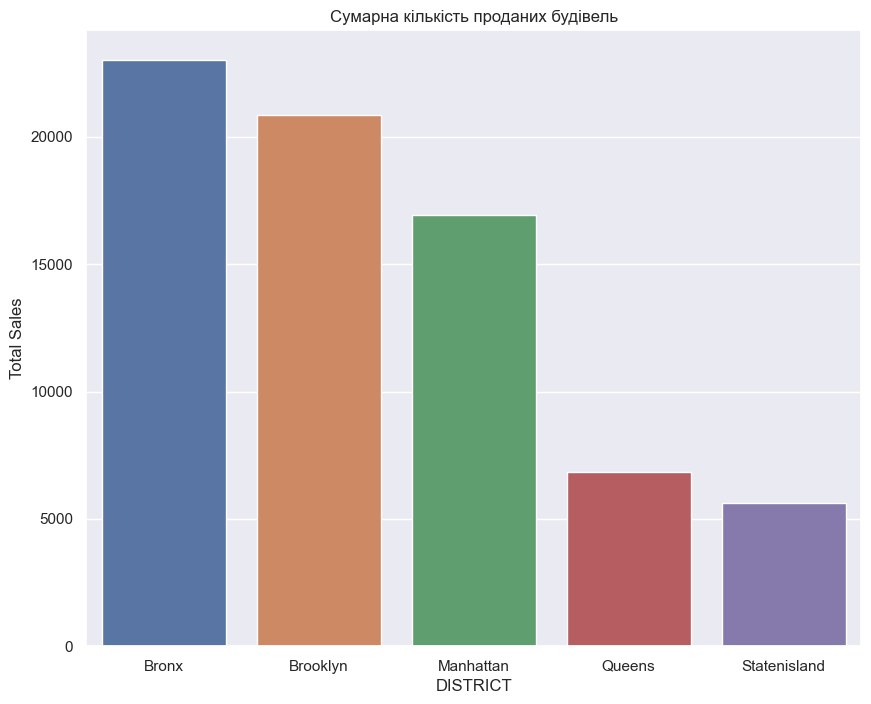

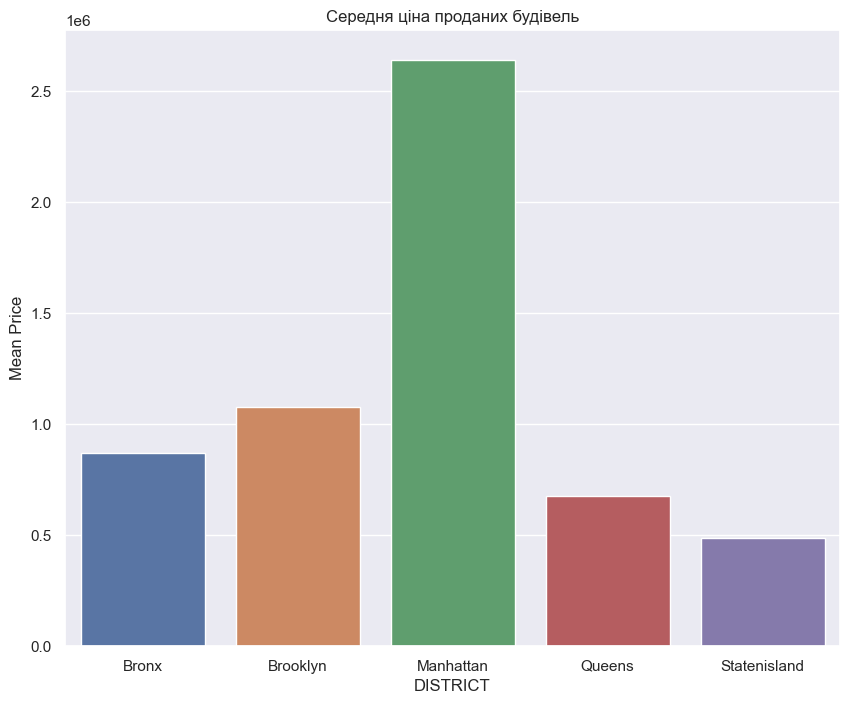

In [38]:
sns.barplot(x=df['DISTRICT'].unique(), y=df['DISTRICT'].value_counts(), data=df)
plt.title('Сумарна кількість проданих будівель')
plt.xlabel('DISTRICT')
plt.ylabel('Total Sales')
plt.show()

sns.barplot(x=df['DISTRICT'].unique(), y=df.groupby("DISTRICT")["SALE PRICE"].mean(), data=df)
plt.title('Середня ціна проданих будівель')
plt.xlabel('DISTRICT')
plt.ylabel('Mean Price')
plt.show()